# Capstone Project:  Battle Front 2-The Good, The Bad, and the Dark Side
# Analysis After Release
## Robin Henderson, Shunmas Cummings
###  "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

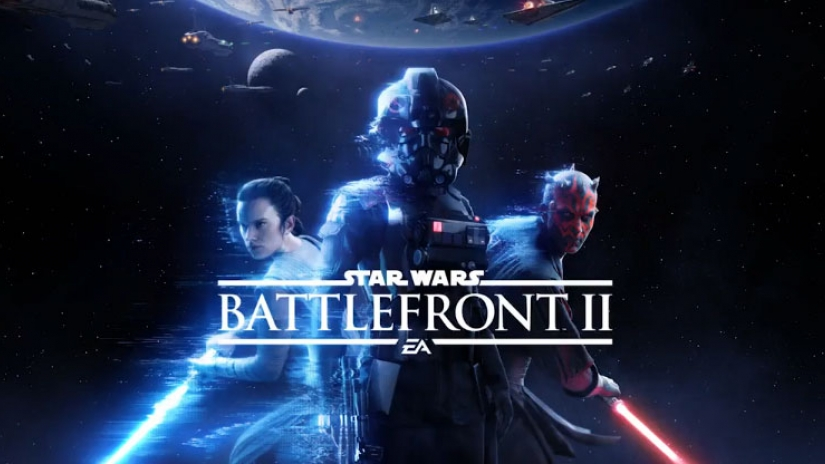

In [1]:
from IPython.display import Image
Image("starwars.jpg")

#  These are the business questions we are going to answer with our data we extracted from Twitter using various hashtags.
#### The data used in this notebook is from after the release of the game on November 17th, 2017.  It is about 5 days worth of data.

+	Main Question:  Has Star Wars Battle Front 2 lived up to its high expectations and all of the media hype before and after its release?
+	Were the tweets that were gathered mostly positive or mostly negative on both sets of data collection?
+	What were the most popular words/hashtags used with positive tweets and negative tweets?
+	With the data that is collected, what will be the overall review for the game for the weeks to come?
+	Looking at the data, what kind of effect will Star Wars Battle Front 2 have on Electronic Arts?


# Library

In [2]:
#Importing neccesary packages

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords


import csv
import pandas as pd

# import packages for text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

from gensim.corpora import Dictionary
from gensim.models import ldamodel

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
from pattern.en import sentiment

C:\Users\ltrth\AppData\Local\Continuum\Anaconda2\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Retrieve and Process Battlefront 1 Data (JSON File)

In [3]:
with open('battlefront2.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictionary
    print(json.dumps(tweet, indent=4)) 
    

{
    "quote_count": 0, 
    "contributors": null, 
    "truncated": false, 
    "text": "RT @EAStarWars: RT for a chance to win a Star Wars Galactic Empire @NVIDIA TITAN Xp Collector\u2019s Edition GPU.\u2026 ", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "reply_count": 0, 
    "id": 931649625899065344, 
    "favorite_count": 0, 
    "entities": {
        "user_mentions": [
            {
                "id": 3033103596, 
                "indices": [
                    3, 
                    14
                ], 
                "id_str": "3033103596", 
                "screen_name": "EAStarWars", 
                "name": "EAStarWars"
            }, 
            {
                "id": 61559439, 
                "indices": [
                    67, 
                    74
                ], 
                "id_str": "61559439", 
                "screen_name": "nvidia", 
                "name": "NVIDIA"
            }
        ], 
        "symbols": [], 
 

# Exploratory Data Analysis

In [4]:
# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('battlefront2.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print len(data)

143363


In [5]:
# Seeing how many Tweets
texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

143355

In [6]:
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)  

143355

In [7]:
screen_names = [T['user']['screen_name'] for T in tweets]
len(screen_names)

143355

In [8]:
for i in tweets[:5]:
    print i['user']['screen_name'], i['text']

JHanswille RT @EAStarWars: RT for a chance to win a Star Wars Galactic Empire @NVIDIA TITAN Xp Collector’s Edition GPU.… 
cachou94000 RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours 🎁🎁 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu évènement… 
RemiDelienne RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours 🎁🎁 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu évènement… 
Jerometar2 RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours 🎁🎁 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu évènement… 
Savari_1992 RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours 🎁🎁 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu évènement… 


In [9]:
# Seeing how many screen names are within the dataset (If they made multiple tweets, they are counted as one)
from collections import Counter

c = Counter(screen_names)
len(c)

81974

In [10]:
#Most Common screen names within dataset
c.most_common(10)

[(u'Sindershift', 188),
 (u'rudipitt', 168),
 (u'tonyross80', 167),
 (u'SGTShotYou', 116),
 (u'Ponds908', 111),
 (u'gamesmatome', 105),
 (u'radnbadmax', 104),
 (u'stormhawk1000', 103),
 (u'TwitchSharer', 96),
 (u'JackieandRed', 94)]

In [11]:
#Finding out how many original tweets are in dataset
originaltweets = []

for tweet in texts:
    if 'rt @' not in tweet.lower():
        originaltweets.append(tweet)
        
len(originaltweets)

48060

In [12]:
# Converting to a float, to make it a decimal to calcualte the ratio between original and retweets
originaltweetcount = len(originaltweets)
originaltweetcount = float(originaltweetcount)
originaltweetcount

48060.0

In [13]:
# get retweets only

#remove retweets

retweets_only = []

for tweet in texts:
    if 'rt @' in tweet.lower():
        retweets_only.append(tweet)
        
len(retweets_only)

95295

In [14]:
# Converting to a float, to make it a decimal to calcualte the ratio between original and retweets
retweets_onlycount = len(retweets_only)
retweets_onlycount = float(retweets_onlycount)
retweets_onlycount

95295.0

In [15]:
# Ratio of orignal tweets to retweets
originaltweetcount / retweets_onlycount

0.5043286636234849

In [16]:
# Converting specific data from the tweets into a Data Frame
df2 = []

screen_names = [T['user']['screen_name'] for T in tweets]
followers_count = [status['user']['followers_count'] for status in tweets if 'user' in status]
friends_count = [status['user']['friends_count'] for status in tweets if 'user' in status]
texts = [T['text'] for T in tweets]



moviedata = zip(screen_names, followers_count, friends_count, texts)
for row in moviedata:
         df2.append(row)
df2 = pd.DataFrame(df2)
df2.columns = ['Author_Screen_Name', 'Followers_Count', 'friends_count', 'Text']
df2.head()

,Author_Screen_Name,Followers_Count,friends_count,Text
0,JHanswille,0,42,RT @EAStarWars: RT for a chance to win a Star ...
1,cachou94000,167,2958,RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours...
2,RemiDelienne,92,1871,RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours...
3,Jerometar2,146,2509,RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours...
4,Savari_1992,106,1846,RT @prizee_officiel: 🎁🎁 NOUVEAU #JeuConcours...


In [17]:
# Preprocessing

#lowercase
df2['Text'] = df2.Text.str.lower()
# find out original tweets & retweets
df2['retweet'] = df2.Text.str.startswith("rt")
# find hashtags and put them in a new column
df2['hashtags'] = df2.Text.str.findall(r"(?<=#)\w+")
df2.head()

,Author_Screen_Name,Followers_Count,friends_count,Text,retweet,hashtags
0,JHanswille,0,42,rt @eastarwars: rt for a chance to win a star ...,True,[]
1,cachou94000,167,2958,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...,True,"[jeuconcours, rt, follow]"
2,RemiDelienne,92,1871,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...,True,"[jeuconcours, rt, follow]"
3,Jerometar2,146,2509,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...,True,"[jeuconcours, rt, follow]"
4,Savari_1992,106,1846,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...,True,"[jeuconcours, rt, follow]"


In [18]:
# Renaming columns and creating a new data frame
df3 = pd.DataFrame({
'screen_name': df2['Author_Screen_Name'].repeat(df2['hashtags'].str.len()),
'f_count': df2['Followers_Count'].repeat(df2['hashtags'].str.len()),
'friends_count': df2['friends_count'].repeat(df2['hashtags'].str.len()),
'retweet': df2['retweet'].repeat(df2['hashtags'].str.len()),
'text': df2['Text'].repeat(df2['hashtags'].str.len()),
'hashtag': df2['hashtags'].sum()
})

print df3.info()
df3.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132887 entries, 1 to 143354
Data columns (total 6 columns):
f_count          132887 non-null int64
friends_count    132887 non-null int64
hashtag          132887 non-null object
retweet          132887 non-null bool
screen_name      132887 non-null object
text             132887 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 6.2+ MB
None


,f_count,friends_count,hashtag,retweet,screen_name,text
1,167,2958,jeuconcours,True,cachou94000,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
1,167,2958,rt,True,cachou94000,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
1,167,2958,follow,True,cachou94000,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
2,92,1871,jeuconcours,True,RemiDelienne,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
2,92,1871,rt,True,RemiDelienne,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
2,92,1871,follow,True,RemiDelienne,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
3,146,2509,jeuconcours,True,Jerometar2,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
3,146,2509,rt,True,Jerometar2,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
3,146,2509,follow,True,Jerometar2,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...
4,106,1846,jeuconcours,True,Savari_1992,rt @prizee_officiel: 🎁🎁 nouveau #jeuconcours...


In [19]:
# This block of code gets rid of all tweets that are not specifically linked to our hashtags we used to collect the data

df_hashtag = pd.read_csv("battlefront1.csv")
df_hashtag

# merge two dataframes
# this way I remove tweets containing those hashtags NOT in my movie list.

df_data = pd.merge(df_hashtag, df3, on='hashtag')
df_data.head()

,hashtag,f_count,friends_count,retweet,screen_name,text
0,battlefront2,135,1578,False,SirMohk,https://t.co/ufamvy9zmn @karlsanada13 @thegame...
1,battlefront2,1032,1836,True,Bot4IndieDevs,rt @sirmohk: https://t.co/ufamvy9zmn @karlsana...
2,battlefront2,1869,1571,False,Lidia_vallecas,#game #star #wars #battlefront2 #elite #troope...
3,battlefront2,265,1092,False,RexManning,@iqasem #battlefront2 it is
4,battlefront2,273,501,False,tmoss0185,i’m a ways into the #battlefront2 single playe...


In [20]:
# Converting retweet column into integers
df_data.retweet = df_data.retweet.astype(int)
df_data.head(25)

,hashtag,f_count,friends_count,retweet,screen_name,text
0,battlefront2,135,1578,0,SirMohk,https://t.co/ufamvy9zmn @karlsanada13 @thegame...
1,battlefront2,1032,1836,1,Bot4IndieDevs,rt @sirmohk: https://t.co/ufamvy9zmn @karlsana...
2,battlefront2,1869,1571,0,Lidia_vallecas,#game #star #wars #battlefront2 #elite #troope...
3,battlefront2,265,1092,0,RexManning,@iqasem #battlefront2 it is
4,battlefront2,273,501,0,tmoss0185,i’m a ways into the #battlefront2 single playe...
5,battlefront2,21,27,0,The_Blood_Claw,the first part of my new lets play on my new s...
6,battlefront2,5584,100,0,Jeshua_Revan,primer gameplay de #battlefront2 :d\n\n#starwa...
7,battlefront2,62,301,0,Yegore,you've gone too far this time! the people have...
8,battlefront2,256,2891,0,bikitsudohashir,@prizee_officiel #battlefront2 #ps4 #lesdernie...
9,battlefront2,4,15,0,KookyBone,if ea would make honest adverts... https://t.c...


In [21]:
# Groupby by our hashtags that we used
df_data.groupby('hashtag').count()

,f_count,friends_count,retweet,screen_name,text
hashtag,,,,,
battlefront2,13778,13778,13778,13778,13778
battlefrontii,3132,3132,3132,3132,3132
bf2,132,132,132,132,132
bfii,6,6,6,6,6
eastarwars,96,96,96,96,96
starwarsbattlefront2,2400,2400,2400,2400,2400
starwarsbattlefrontii,63620,63620,63620,63620,63620
swbf2,9356,9356,9356,9356,9356
swbfii,360,360,360,360,360


In [22]:
#Groupby by hashtag and seeing how many screen names per hashtag
df_data.groupby('hashtag')['screen_name'].nunique().reset_index()

,hashtag,screen_name
0,battlefront2,5317
1,battlefrontii,1149
2,bf2,59
3,bfii,3
4,eastarwars,34
5,starwarsbattlefront2,1735
6,starwarsbattlefrontii,41765
7,swbf2,3805
8,swbfii,158


# The Start of our Sentiment Analysis of our Data
+ First we will use the Pattern Package to conduct sentiment analysis and seperate positive and negative tweets
+ Second, we will use the Bing-Liu Lexicon to conduct sentiment analysis and seperate positive and negative tweets

In [23]:
texts[:5]

[u'RT @EAStarWars: RT for a chance to win a Star Wars Galactic Empire @NVIDIA TITAN Xp Collector\u2019s Edition GPU.\u2026 ',
 u'RT @prizee_officiel: \U0001f381\U0001f381 NOUVEAU #JeuConcours \U0001f381\U0001f381 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu \xe9v\xe8nement\u2026 ',
 u'RT @prizee_officiel: \U0001f381\U0001f381 NOUVEAU #JeuConcours \U0001f381\U0001f381 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu \xe9v\xe8nement\u2026 ',
 u'RT @prizee_officiel: \U0001f381\U0001f381 NOUVEAU #JeuConcours \U0001f381\U0001f381 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu \xe9v\xe8nement\u2026 ',
 u'RT @prizee_officiel: \U0001f381\U0001f381 NOUVEAU #JeuConcours \U0001f381\U0001f381 #RT+ #Follow @prizee_officiel pour tenter de gagner le jeu \xe9v\xe8nement\u2026 ']

In [24]:
# Grabbing all of the english tweets
english = []
for i in tweets:
    if i['user']['lang'] == "en":
        english.append(i)
len(english)

94759

In [25]:
# Grabbing all of the tweets that were english and original
english_originaltweets = []

for tweet in english:
    if 'rt @' not in tweet['text'].lower():
        english_originaltweets.append(tweet['text'])        
len(english_originaltweets)

34335

In [26]:
# Cleaning of the origianl english tweets

# Remove useless numbers and alphanumerical words including http     
documents = [re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text) for text in english_originaltweets]
# tokenize
texts = [[word for word in text.lower().split() ] for text in documents]
# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in text ] for text in texts]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
english_originaltweets_clean = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [27]:
# A list of extra stopwords
extra_stopwords = ['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','really','see','want','nice',
            'while','know','free','today','day','always','last','put','live',
            'week','went','wasn','was','used','ugh','try','kind', 'http','much',
            'need', 'next','app','ibm','appleevent','using']

extra_stoplist = extra_stopwords
english_originaltweets_clean = [[word for word in text if word not in extra_stoplist] for text in english_originaltweets_clean]
#https://github.com/alexperrier/datatalks/blob/master/debates/R/stm.R

In [28]:
english_originaltweets_clean[:5]

[[u'might', u'actually', u'buy', u'instead'],
 [u'buy', u'call', u'duty', u'ww2', u'instead'],
 [u'cute', u'well', u'done'],
 [u'sorry', u'settle', u'half', u'assed', u'stuff', u'hitting'],
 [u'streaming', u'come', u'playing', u'starwarsbattlefrontii', u'love']]

In [29]:
english_originaltweets_clean = [x for x in english_originaltweets_clean if x]
english_originaltweets_clean[:5]

[[u'might', u'actually', u'buy', u'instead'],
 [u'buy', u'call', u'duty', u'ww2', u'instead'],
 [u'cute', u'well', u'done'],
 [u'sorry', u'settle', u'half', u'assed', u'stuff', u'hitting'],
 [u'streaming', u'come', u'playing', u'starwarsbattlefrontii', u'love']]

# Using the Pattern Package in Python to Conduct Sentiment Analysis

In [30]:
for tweet in english_originaltweets_clean[:5]:
    score = sentiment(tweet)
    print score[0], score[1] 

0.0 0.1
0.0 0.0
0.5 1.0
-0.333333333333 0.583333333333
0.5 0.6


In [31]:
# Seperating the tweets into specific "baskets"
positive_review = []
negative_review = []
neutral_review = []

for row in english_originaltweets_clean:
    tweet = row[0]
    score = sentiment(tweet)
    if score[0] > 0:
        positive_review.append(tweet)
    elif score[0] == 0:
        neutral_review.append(tweet)
    else:
        negative_review.append(tweet)

In [32]:
# How many of each kind of tweet
print len(positive_review)
print len(negative_review)
print len(neutral_review)

2790
1421
28460


# Positive Tweets with the Pattern Package

In [33]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in positive_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [34]:
# remove extra brackets)
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens[:10]

[u'cute',
 u'enjoying',
 u'lol',
 u'absolutely',
 u'clearly',
 u'excited',
 u'wonderful',
 u'honest',
 u'sound',
 u'love']

In [35]:
# Getting rid of the "u" by encoding the data
cleaned_positive_review_tokens =  [x.encode('utf-8') for x in cleaned_positive_review_tokens]

In [36]:
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(cleaned_positive_review_tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(10)

[(('love', 'love'), 48),
 (('lol', 'love'), 20),
 (('latest', 'love'), 15),
 (('love', 'huge'), 15),
 (('love', 'liked'), 15),
 (('love', 'latest'), 13),
 (('love', 'lol'), 13),
 (('win', 'love'), 12),
 (('liked', 'love'), 12),
 (('liked', 'liked'), 11)]

In [37]:
# Word Frequency analysis of the positive tweets

from collections import Counter

positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common(10)

[('love', 306),
 ('lol', 141),
 ('liked', 125),
 ('latest', 103),
 ('huge', 102),
 ('win', 96),
 ('first', 82),
 ('loving', 73),
 ('enjoying', 62),
 ('sure', 59)]

In [38]:
positivefdist = nltk.FreqDist(cleaned_positive_review_tokens)
positivefdist.most_common(10)

[('love', 306),
 ('lol', 141),
 ('liked', 125),
 ('latest', 103),
 ('huge', 102),
 ('win', 96),
 ('first', 82),
 ('loving', 73),
 ('enjoying', 62),
 ('sure', 59)]

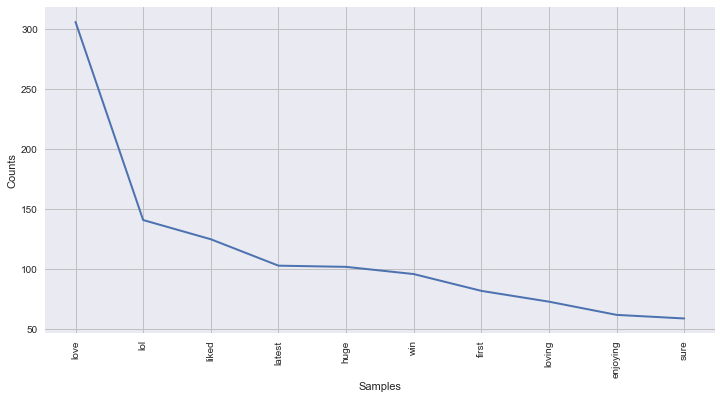

In [39]:
plt.figure(figsize=(12,6))
positivefdist.plot(10)

In [40]:
# Thrown into a dataframe

positivereview_wordfreq = pd.DataFrame(positive_review_wordcounts.most_common())
positivereview_wordfreq.head(10)

,0,1
0,love,306
1,lol,141
2,liked,125
3,latest,103
4,huge,102
5,win,96
6,first,82
7,loving,73
8,enjoying,62
9,sure,59


(-0.5, 999.5, 999.5, -0.5)

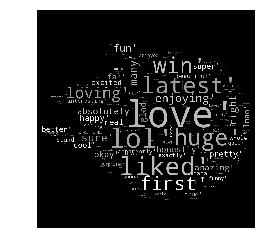

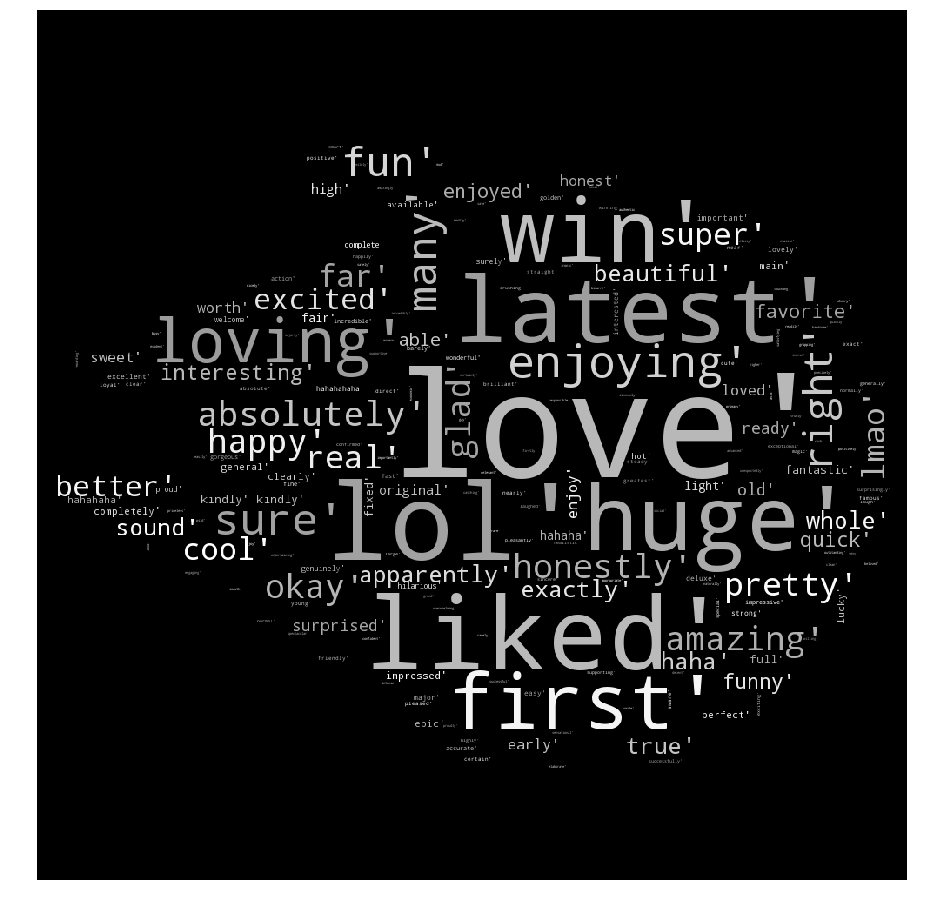

In [41]:
# Creating a word cloud displaying the words from the positive reviews

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import random
from PIL import Image
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


text = str(cleaned_positive_review_tokens)
mask = np.array(Image.open(path.join("falcon.jpg")))
# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=2000, mask=mask,  color_func=grey_color_func).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

# Negative Tweets with the Pattern Package

In [42]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in negative_review] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [43]:
# remove extra brackets)
cleaned_negative_review_tokens = [x for y in texts for x in y]
cleaned_negative_review_tokens[:10]

[u'sorry',
 u'game',
 u'fuck',
 u'awful',
 u'half',
 u'sorry',
 u'fuck',
 u'game',
 u'game',
 u'badly']

In [44]:
# Getting rid of the "u" by encoding the data
cleaned_negative_review_tokens =  [x.encode('utf-8') for x in cleaned_negative_review_tokens]

In [45]:
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(cleaned_negative_review_tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(10)

[(('game', 'game'), 102),
 (('fuck', 'game'), 38),
 (('game', 'fuck'), 30),
 (('game', 'sorry'), 19),
 (('mean', 'game'), 19),
 (('game', 'fucking'), 16),
 (('sorry', 'game'), 15),
 (('game', 'mean'), 14),
 (('fuck', 'fuck'), 12),
 (('bad', 'game'), 12)]

In [46]:
# word frequency analysis of the negative tweets
from collections import Counter

negative_review_wordcounts= Counter(cleaned_negative_review_tokens)
negative_review_wordcounts.most_common(10)

[('game', 366),
 ('fuck', 113),
 ('sorry', 61),
 ('mean', 52),
 ('fucking', 47),
 ('bad', 45),
 ('seriously', 32),
 ('hate', 30),
 ('shit', 28),
 ('long', 25)]

In [47]:
negativefdist = nltk.FreqDist(cleaned_negative_review_tokens)
negativefdist.most_common(10)

[('game', 366),
 ('fuck', 113),
 ('sorry', 61),
 ('mean', 52),
 ('fucking', 47),
 ('bad', 45),
 ('seriously', 32),
 ('hate', 30),
 ('shit', 28),
 ('long', 25)]

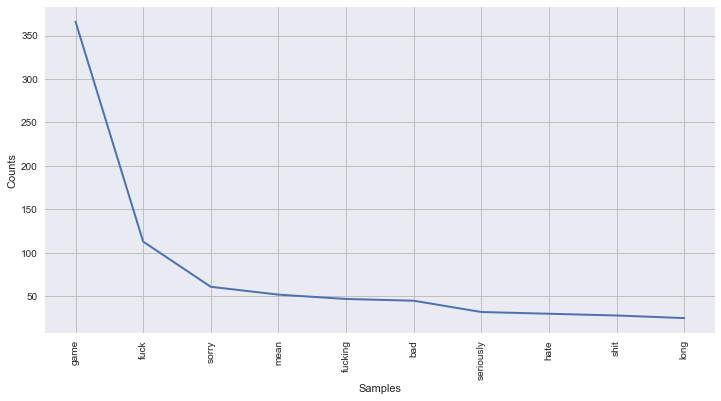

In [48]:
plt.figure(figsize=(12,6))
negativefdist.plot(10)

In [49]:
# save the word frequency in dataframe (Excel like)
negativereview_wordfreq = pd.DataFrame(negative_review_wordcounts.most_common())
negativereview_wordfreq.head(10)

,0,1
0,game,366
1,fuck,113
2,sorry,61
3,mean,52
4,fucking,47
5,bad,45
6,seriously,32
7,hate,30
8,shit,28
9,long,25


(-0.5, 1189.5, 1027.5, -0.5)

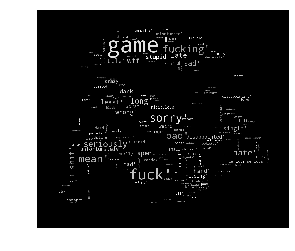

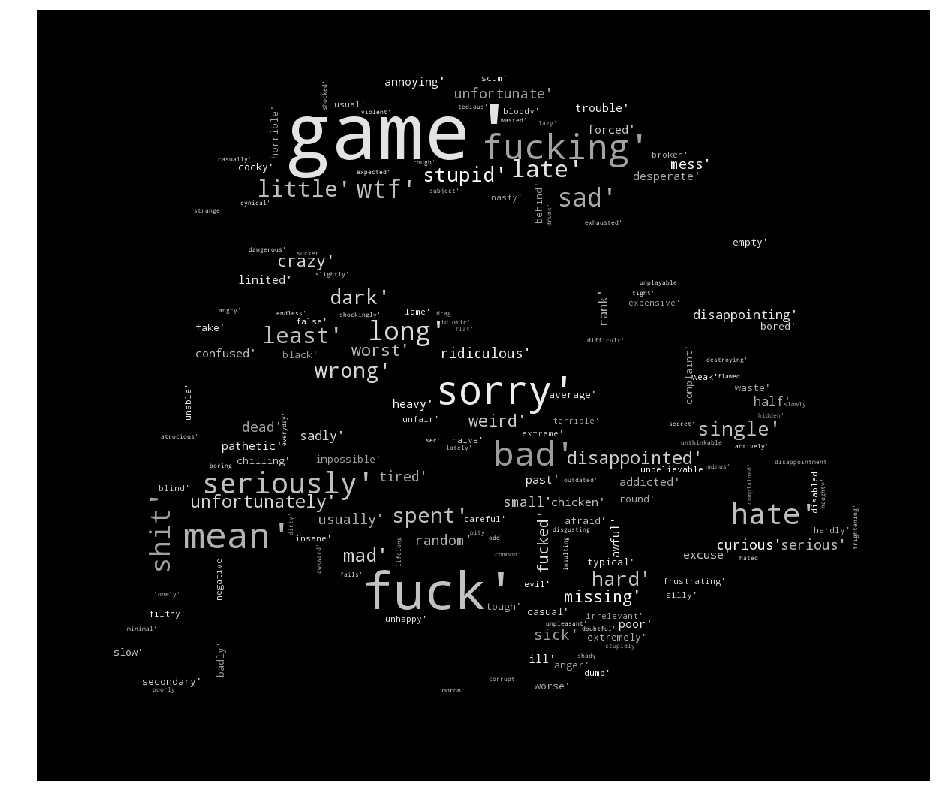

In [50]:
#Creating a word cloud using the words from the negative tweets

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import random
from PIL import Image
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

text = str(cleaned_negative_review_tokens)
mask = np.array(Image.open(path.join("storm.png")))
# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=4000, mask=mask, color_func=grey_color_func).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

# Conducting Sentiment Analysis using Bing-Liu Lexicons

In [51]:
#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("positive-words.txt", "rb").read().splitlines()
negative_words = open("negative-words.txt", "rb").read().splitlines()

In [52]:
for sentence in english_originaltweets_clean[:5]:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

0 0 0 Neutral
0 0 0 Neutral
2 0 2 Positive
0 1 -1 Negative
1 0 1 Positive


In [53]:
# Seperating the tweets into specific baskets

positive_review = []
negative_review = []
neutral_review = []


for sentence in english_originaltweets_clean:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [54]:
# Number of tweets per basket

print len(positive_review)
print len(negative_review)
print len(neutral_review)

7028
7139
18504


# Positive Tweets using Bing-Liu Lexicons

In [55]:
# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['lol','still','win','pay','ice', 'from', 'game', 'battlefront2', 'starwarsbattlefrontii', 'battlefront', 'people', 'bf2', 'star', 'war', 'dice', 'well', 'starwarsbattlefront2', 'swbf2', 'guy'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in positive_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [56]:
# remove extra brackets
cleaned_positive_review_tokens = [x for y in texts for x in y]
cleaned_positive_review_tokens[:10]

[u'cute',
 u'done',
 u'streaming',
 u'come',
 u'playing',
 u'love',
 u'trust',
 u'second',
 u'picking',
 u'starwarsbf2']

In [57]:
cleaned_positive_review_tokens =  [x.encode('utf-8') for x in cleaned_positive_review_tokens]

In [58]:
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(cleaned_positive_review_tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(10)

[(('gaming', 'giveaway'), 319),
 (('prize', 'pack'), 255),
 (('entered', 'giveaway'), 254),
 (('giveaway', 'chance'), 232),
 (('chance', 'supermarioodyssey'), 231),
 (('entered', 'gaming'), 231),
 (('supermarioodyssey', 'codwwii'), 231),
 (('giveaway', 'prize'), 216),
 (('hero', 'villain'), 108),
 (('liked', 'video'), 92)]

In [59]:
# word frequency
from collections import Counter

positive_review_wordcounts= Counter(cleaned_positive_review_tokens)
positive_review_wordcounts.most_common(10)

[('giveaway', 745),
 ('love', 602),
 ('hero', 572),
 ('entered', 491),
 ('campaign', 459),
 ('fun', 395),
 ('gaming', 384),
 ('play', 343),
 ('right', 321),
 ('chance', 305)]

In [60]:
positivefdist = nltk.FreqDist(cleaned_positive_review_tokens)
positivefdist.most_common(10)

[('giveaway', 745),
 ('love', 602),
 ('hero', 572),
 ('entered', 491),
 ('campaign', 459),
 ('fun', 395),
 ('gaming', 384),
 ('play', 343),
 ('right', 321),
 ('chance', 305)]

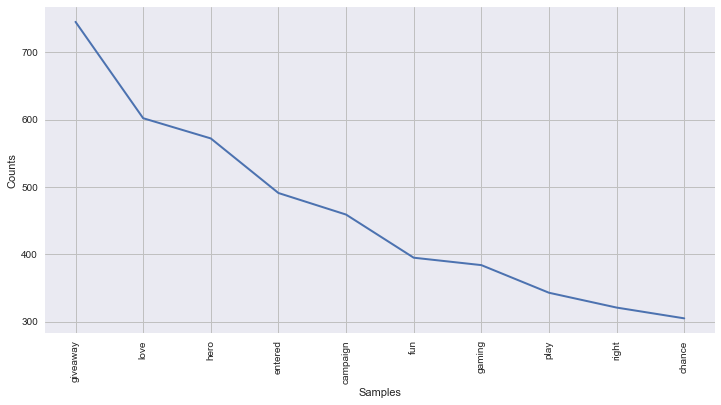

In [61]:
plt.figure(figsize=(12,6))
positivefdist.plot(10)

In [62]:
# save the word frequency in dataframe (Excel like)
positivereview_wordfreq = pd.DataFrame(positive_review_wordcounts.most_common())
positivereview_wordfreq.head(10)

,0,1
0,giveaway,745
1,love,602
2,hero,572
3,entered,491
4,campaign,459
5,fun,395
6,gaming,384
7,play,343
8,right,321
9,chance,305


(-0.5, 999.5, 999.5, -0.5)

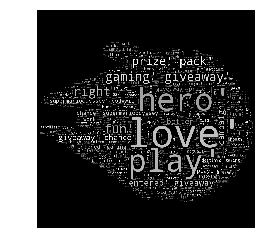

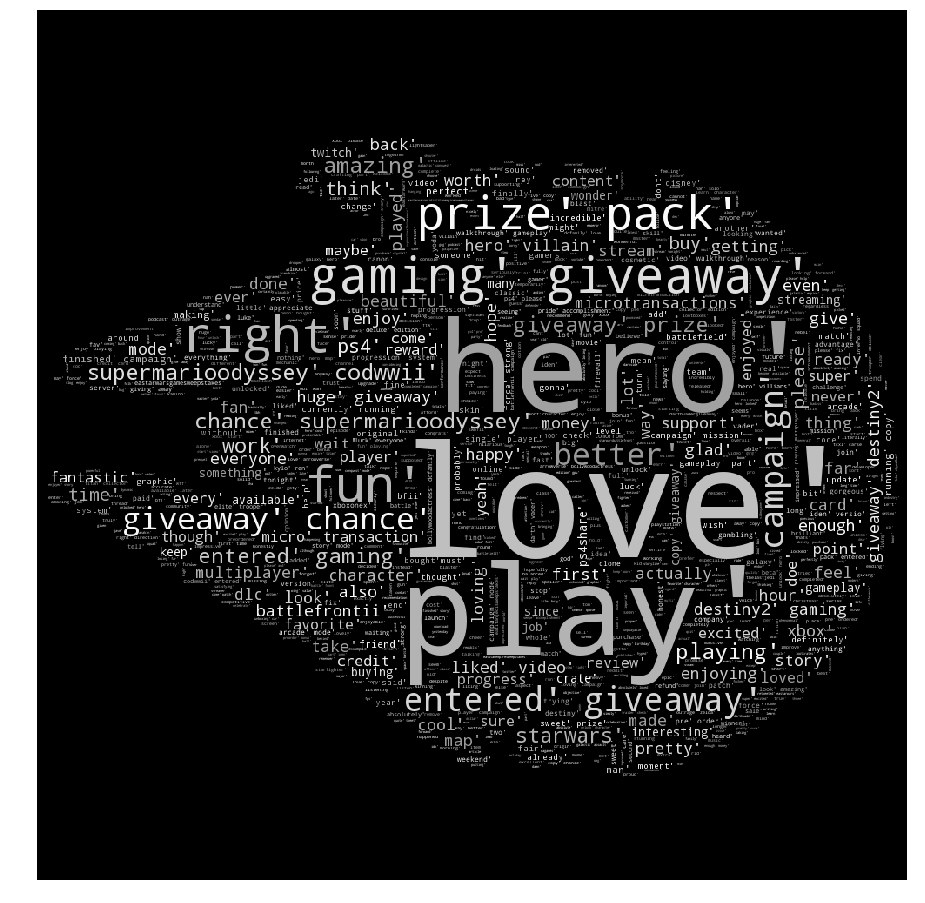

In [63]:
#Creating a word cloud using the positive tweets generated by the Bing-Liu Lexicons

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import random
from PIL import Image
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


text = str(cleaned_positive_review_tokens)
mask = np.array(Image.open(path.join("falcon.jpg")))
# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=1000, mask=mask, color_func=grey_color_func).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

# Negative Tweets using Bing-Liu Lexicons

In [64]:
# remove common words 
stoplist = stopwords.words('english')
# if you want to remove additional words ... here I consider ice and from as unimportant words
more = set(['lol','still','ice', 'from', 'game', 'battlefront2', 'starwarsbattlefrontii', 'battlefront', 'people', 'bf2', 'star', 'war', 'dice', 'well', 'starwarsbattlefront2', 'swbf2', 'guy'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in negative_review]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [65]:
# remove extra brackets
cleaned_negative_review_tokens = [x for y in texts for x in y]
cleaned_negative_review_tokens[:10]

[u'sorry',
 u'settle',
 u'half',
 u'assed',
 u'stuff',
 u'hitting',
 u'getting',
 u'bad',
 u'broken',
 u'pushed']

In [66]:
cleaned_negative_review_tokens =  [x.encode('utf-8') for x in cleaned_negative_review_tokens]

In [67]:
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(cleaned_negative_review_tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)
fdist_bi.most_common(10)

[(('loot', 'box'), 253),
 (('loot', 'crate'), 133),
 (('micro', 'transaction'), 126),
 (('galactic', 'assault'), 107),
 (('dark', 'side'), 80),
 (('starfighter', 'assault'), 64),
 (('progression', 'system'), 62),
 (('come', 'hang'), 45),
 (('please', 'fix'), 41),
 (('pay', 'win'), 35)]

In [68]:
# word frequency
from collections import Counter

negative_review_wordcounts= Counter(cleaned_negative_review_tokens)
negative_review_wordcounts.most_common(10)

[('loot', 425),
 ('bad', 311),
 ('play', 303),
 ('fuck', 272),
 ('box', 261),
 ('shit', 259),
 ('assault', 234),
 ('time', 231),
 ('issue', 219),
 ('buy', 218)]

In [69]:
negativefdist = nltk.FreqDist(cleaned_negative_review_tokens)
negativefdist.most_common(10)

[('loot', 425),
 ('bad', 311),
 ('play', 303),
 ('fuck', 272),
 ('box', 261),
 ('shit', 259),
 ('assault', 234),
 ('time', 231),
 ('issue', 219),
 ('buy', 218)]

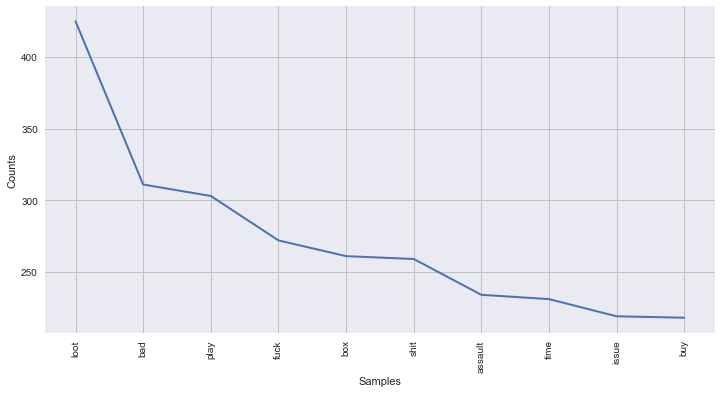

In [70]:
plt.figure(figsize=(12,6))
negativefdist.plot(10)

In [71]:
# save the word frequency in dataframe (Excel like)
negativereview_wordfreq = pd.DataFrame(negative_review_wordcounts.most_common())
negativereview_wordfreq.head(10)

,0,1
0,loot,425
1,bad,311
2,play,303
3,fuck,272
4,box,261
5,shit,259
6,assault,234
7,time,231
8,issue,219
9,buy,218


(-0.5, 959.5, 1023.5, -0.5)

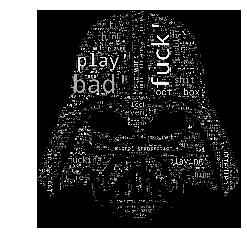

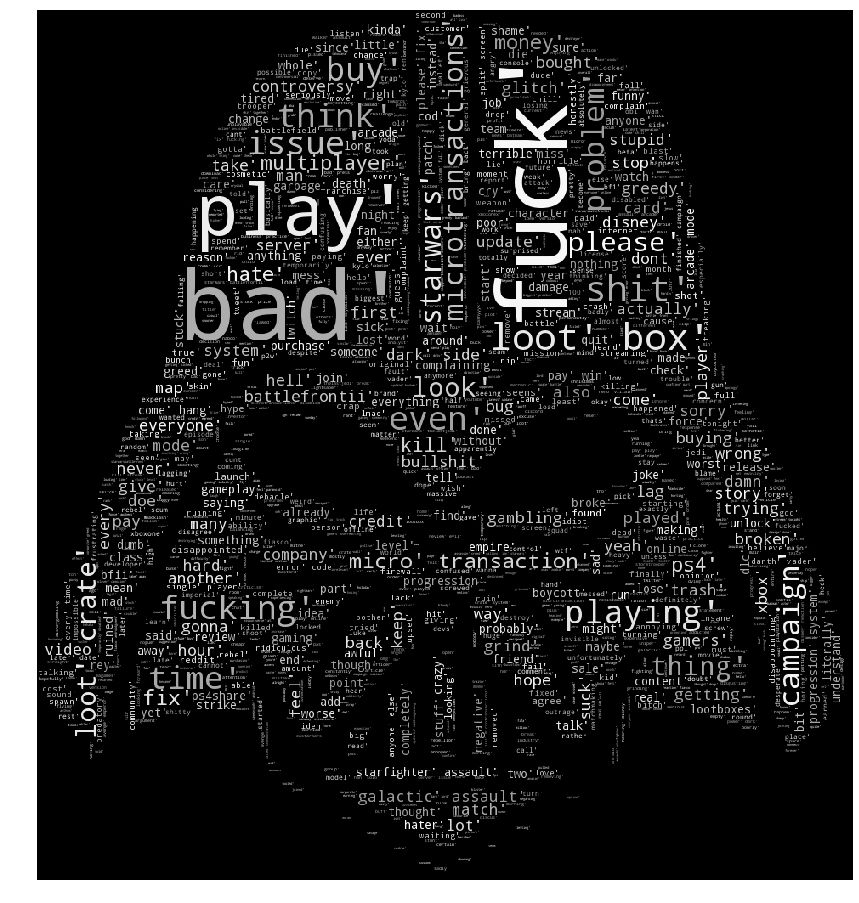

In [72]:
#Creating a word cloud using the negative tweets generated by the Bing-Liu Lexicons

from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import random
from PIL import Image
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


text = str(cleaned_negative_review_tokens)
mask = np.array(Image.open(path.join("darthvader.jpg")))
# Generate a word cloud image
wc = WordCloud(background_color="black", max_words=2000, mask=mask, color_func=grey_color_func).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

# Topic Modeling of the Original English Tweets

In [73]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [74]:
english_originaltweets_clean[:5]

[[u'might', u'actually', u'buy', u'instead'],
 [u'buy', u'call', u'duty', u'ww2', u'instead'],
 [u'cute', u'well', u'done'],
 [u'sorry', u'settle', u'half', u'assed', u'stuff', u'hitting'],
 [u'streaming', u'come', u'playing', u'starwarsbattlefrontii', u'love']]

In [75]:
# this is text processing required for topic modeling with Gensim
dictionary = Dictionary(english_originaltweets_clean)
corpus = [dictionary.doc2bow(text) for text in english_originaltweets_clean]

2017-12-06 13:04:01,832 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-12-06 13:04:01,943 : INFO : adding document #10000 to Dictionary(7616 unique tokens: [u'yellow', u'four', u'hanging', u'looking', u'eligible']...)
2017-12-06 13:04:02,058 : INFO : adding document #20000 to Dictionary(11785 unique tokens: [u'danganronpa', u'yellow', u'four', u'hanging', u'areyoukiddingme']...)
2017-12-06 13:04:02,214 : INFO : adding document #30000 to Dictionary(15476 unique tokens: [u'danganronpa', u'secondly', u'yellow', u'iflytek', u'four']...)
2017-12-06 13:04:02,266 : INFO : built Dictionary(16337 unique tokens: [u'danganronpa', u'secondly', u'yellow', u'iflytek', u'four']...) from 32671 documents (total 185579 corpus positions)


In [76]:
corpus[:5]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 1), (1, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]]

In [77]:
# Running the model to find out the total topics

np.random.seed(1) # setting random seed to get the same results each time. For a large dataset, high passes (75) would be desirable.
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, passes=20)

2017-12-06 13:04:04,782 : INFO : using symmetric alpha at 0.0666666666667
2017-12-06 13:04:04,783 : INFO : using symmetric eta at 6.12107486075e-05
2017-12-06 13:04:04,789 : INFO : using serial LDA version on this node
2017-12-06 13:04:07,515 : INFO : running online (multi-pass) LDA training, 15 topics, 20 passes over the supplied corpus of 32671 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2017-12-06 13:04:07,515 : INFO : PROGRESS: pass 0, at document #2000/32671
2017-12-06 13:04:09,099 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:04:09,157 : INFO : topic #7 (0.067): 0.035*"game" + 0.022*"starwarsbattlefrontii" + 0.014*"campaign" + 0.013*"battlefront" + 0.012*"battlefront2" + 0.012*"eastarwarsgamesweepstakes" + 0.008*"purchase" + 0.008*"story" + 0.007*"starwars" + 0.006*"buy"
2017-12-06 13:04:09,160 : INFO : topic #2 (0.067): 0.025*"

2017-12-06 13:04:16,436 : INFO : topic #5 (0.067): 0.034*"starwarsbattlefrontii" + 0.028*"battlefront2" + 0.026*"micro" + 0.025*"transaction" + 0.021*"come" + 0.011*"streaming" + 0.011*"time" + 0.011*"join" + 0.010*"game" + 0.009*"code"
2017-12-06 13:04:16,437 : INFO : topic #1 (0.067): 0.126*"starwarsbattlefrontii" + 0.036*"starwarsbattlefront2" + 0.024*"swbf2" + 0.021*"ps4share" + 0.020*"eatitanempiresweepstakes" + 0.015*"starwars" + 0.011*"graphic" + 0.010*"latest" + 0.010*"kylo" + 0.009*"check"
2017-12-06 13:04:16,440 : INFO : topic #9 (0.067): 0.199*"xbox" + 0.045*"giveaway" + 0.037*"win" + 0.027*"chance" + 0.025*"please" + 0.022*"codwwii" + 0.021*"entered" + 0.020*"starwarsbattlefrontii" + 0.018*"supermarioodyssey" + 0.016*"copy"
2017-12-06 13:04:16,444 : INFO : topic diff=0.265506, rho=0.408248
2017-12-06 13:04:16,446 : INFO : PROGRESS: pass 0, at document #14000/32671
2017-12-06 13:04:17,713 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06

2017-12-06 13:04:27,628 : INFO : topic #11 (0.067): 0.025*"game" + 0.023*"give" + 0.022*"multiplayer" + 0.021*"fuck" + 0.019*"right" + 0.018*"pretty" + 0.016*"shit" + 0.015*"people" + 0.014*"never" + 0.013*"dice"
2017-12-06 13:04:27,628 : INFO : topic #9 (0.067): 0.091*"xbox" + 0.078*"win" + 0.076*"giveaway" + 0.049*"chance" + 0.038*"copy" + 0.038*"codwwii" + 0.037*"entered" + 0.033*"supermarioodyssey" + 0.026*"starwarsbattlefrontii" + 0.015*"destiny2"
2017-12-06 13:04:27,634 : INFO : topic #0 (0.067): 0.071*"game" + 0.020*"starwarsbattlefrontii" + 0.016*"people" + 0.015*"still" + 0.014*"something" + 0.013*"better" + 0.013*"looking" + 0.013*"time" + 0.011*"buy" + 0.011*"take"
2017-12-06 13:04:27,637 : INFO : topic #13 (0.067): 0.081*"eastarwarsgamesweepstakes" + 0.052*"please" + 0.021*"starwarsbattlefrontii" + 0.016*"vader" + 0.016*"little" + 0.015*"controversy" + 0.012*"darthvadergiveaway" + 0.011*"shot" + 0.011*"weekend" + 0.011*"lord"
2017-12-06 13:04:27,641 : INFO : topic diff=0.30

2017-12-06 13:04:36,430 : INFO : topic #7 (0.067): 0.064*"campaign" + 0.024*"battlefront2" + 0.023*"story" + 0.021*"starwarsbattlefrontii" + 0.019*"bf2" + 0.018*"game" + 0.015*"battlefront" + 0.015*"lot" + 0.015*"part" + 0.014*"played"
2017-12-06 13:04:36,430 : INFO : topic #11 (0.067): 0.026*"game" + 0.025*"give" + 0.025*"fuck" + 0.022*"right" + 0.018*"shit" + 0.017*"multiplayer" + 0.017*"people" + 0.015*"never" + 0.014*"pretty" + 0.013*"actually"
2017-12-06 13:04:36,430 : INFO : topic #2 (0.067): 0.041*"loot" + 0.039*"eatitanjedisweepstakes" + 0.033*"patch" + 0.029*"box" + 0.023*"eastarwarsnvidiatitanempiresweepstakes" + 0.020*"crate" + 0.018*"yeah" + 0.012*"also" + 0.011*"later" + 0.011*"bfii"
2017-12-06 13:04:36,444 : INFO : topic #0 (0.067): 0.081*"game" + 0.024*"people" + 0.017*"still" + 0.016*"starwarsbattlefrontii" + 0.016*"buy" + 0.015*"better" + 0.013*"time" + 0.012*"something" + 0.011*"looking" + 0.011*"take"
2017-12-06 13:04:36,444 : INFO : topic #14 (0.067): 0.045*"bf2" + 

2017-12-06 13:04:42,638 : INFO : topic diff=0.203758, rho=0.235702
2017-12-06 13:04:42,638 : INFO : PROGRESS: pass 1, at document #14000/32671
2017-12-06 13:04:43,717 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:04:43,832 : INFO : topic #5 (0.067): 0.052*"starwarsbattlefrontii" + 0.042*"come" + 0.033*"battlefront2" + 0.031*"micro" + 0.029*"transaction" + 0.020*"stream" + 0.019*"twitch" + 0.017*"streaming" + 0.016*"join" + 0.015*"playing"
2017-12-06 13:04:43,832 : INFO : topic #14 (0.067): 0.046*"gambling" + 0.044*"disney" + 0.037*"bf2" + 0.029*"game" + 0.019*"000" + 0.016*"petition" + 0.015*"signed" + 0.015*"entertainment" + 0.015*"software" + 0.015*"stuff"
2017-12-06 13:04:43,832 : INFO : topic #0 (0.067): 0.081*"game" + 0.023*"people" + 0.020*"still" + 0.020*"starwarsbattlefrontii" + 0.019*"buy" + 0.016*"better" + 0.015*"something" + 0.013*"time" + 0.011*"buying" + 0.011*"making"
2017-12-06 13:04:43,832 : INFO : topic #8 (0.067): 0.058*"d

2017-12-06 13:04:52,292 : INFO : topic #4 (0.067): 0.033*"game" + 0.027*"getting" + 0.025*"bf2" + 0.018*"back" + 0.016*"rey" + 0.015*"sale" + 0.015*"keep" + 0.014*"play" + 0.013*"friend" + 0.013*"battlefront"
2017-12-06 13:04:52,292 : INFO : topic diff=0.199298, rho=0.235702
2017-12-06 13:04:52,292 : INFO : PROGRESS: pass 1, at document #26000/32671
2017-12-06 13:04:53,546 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:04:53,655 : INFO : topic #10 (0.067): 0.087*"battlefront2" + 0.035*"starwars" + 0.025*"mode" + 0.024*"battlefrontii" + 0.022*"game" + 0.020*"feel" + 0.017*"arcade" + 0.015*"gaming" + 0.012*"play" + 0.012*"long"
2017-12-06 13:04:53,655 : INFO : topic #3 (0.067): 0.045*"hero" + 0.034*"look" + 0.022*"game" + 0.020*"video" + 0.017*"amazing" + 0.016*"map" + 0.016*"battlefront" + 0.015*"villain" + 0.014*"darth" + 0.013*"side"
2017-12-06 13:04:53,655 : INFO : topic #0 (0.067): 0.079*"game" + 0.022*"people" + 0.018*"buy" + 0.018*"still

2017-12-06 13:05:00,108 : INFO : topic #13 (0.067): 0.099*"please" + 0.049*"eastarwarsgamesweepstakes" + 0.021*"starwarsbattlefrontii" + 0.018*"little" + 0.016*"controversy" + 0.014*"locked" + 0.014*"save" + 0.010*"shot" + 0.009*"greedy" + 0.009*"predatory"
2017-12-06 13:05:00,108 : INFO : topic #7 (0.067): 0.064*"campaign" + 0.028*"starwarsbattlefrontii" + 0.025*"story" + 0.024*"battlefront2" + 0.019*"bf2" + 0.017*"game" + 0.017*"lot" + 0.015*"played" + 0.015*"part" + 0.015*"battlefront"
2017-12-06 13:05:00,125 : INFO : topic diff=0.137816, rho=0.229416
2017-12-06 13:05:00,125 : INFO : PROGRESS: pass 2, at document #4000/32671
2017-12-06 13:05:01,094 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:05:01,219 : INFO : topic #7 (0.067): 0.066*"campaign" + 0.027*"starwarsbattlefrontii" + 0.025*"story" + 0.024*"battlefront2" + 0.018*"bf2" + 0.018*"game" + 0.016*"lot" + 0.015*"played" + 0.015*"battlefront" + 0.014*"part"
2017-12-06 13:05:01,234 : I

2017-12-06 13:05:07,009 : INFO : topic #13 (0.067): 0.160*"please" + 0.052*"eastarwarsgamesweepstakes" + 0.044*"darthvadergiveaway" + 0.026*"lord" + 0.023*"vader" + 0.018*"starwarsbattlefrontii" + 0.015*"little" + 0.014*"controversy" + 0.010*"ready" + 0.009*"weekend"
2017-12-06 13:05:07,009 : INFO : topic #3 (0.067): 0.041*"hero" + 0.036*"look" + 0.027*"game" + 0.024*"video" + 0.020*"amazing" + 0.017*"map" + 0.016*"vader" + 0.016*"start" + 0.014*"side" + 0.014*"darth"
2017-12-06 13:05:07,009 : INFO : topic diff=0.115942, rho=0.229416
2017-12-06 13:05:07,026 : INFO : PROGRESS: pass 2, at document #16000/32671
2017-12-06 13:05:08,134 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:05:08,244 : INFO : topic #2 (0.067): 0.046*"loot" + 0.032*"box" + 0.030*"eatitanjedisweepstakes" + 0.025*"crate" + 0.024*"eastarwarsnvidiatitanempiresweepstakes" + 0.017*"yeah" + 0.014*"later" + 0.014*"maybe" + 0.012*"man" + 0.012*"said"
2017-12-06 13:05:08,244 : INFO 

2017-12-06 13:05:16,377 : INFO : topic #6 (0.067): 0.123*"ps4" + 0.048*"lol" + 0.031*"pack" + 0.026*"prize" + 0.025*"war" + 0.025*"star" + 0.025*"love" + 0.022*"giveaway" + 0.020*"entered" + 0.017*"may"
2017-12-06 13:05:16,377 : INFO : topic #14 (0.067): 0.055*"disney" + 0.054*"bf2" + 0.040*"gambling" + 0.035*"game" + 0.024*"000" + 0.020*"petition" + 0.020*"signed" + 0.014*"probably" + 0.012*"microtransactions" + 0.012*"stuff"
2017-12-06 13:05:16,377 : INFO : topic #3 (0.067): 0.046*"hero" + 0.039*"look" + 0.022*"game" + 0.019*"video" + 0.018*"amazing" + 0.018*"map" + 0.016*"battlefront" + 0.015*"villain" + 0.014*"darth" + 0.014*"vader"
2017-12-06 13:05:16,377 : INFO : topic #0 (0.067): 0.080*"game" + 0.024*"people" + 0.019*"buy" + 0.019*"still" + 0.016*"starwarsbattlefrontii" + 0.016*"better" + 0.015*"take" + 0.014*"time" + 0.013*"looking" + 0.013*"something"
2017-12-06 13:05:16,377 : INFO : topic diff=0.114744, rho=0.229416
2017-12-06 13:05:16,377 : INFO : PROGRESS: pass 2, at docume

2017-12-06 13:05:23,737 : INFO : topic #8 (0.067): 0.090*"dice" + 0.022*"game" + 0.021*"issue" + 0.021*"assault" + 0.020*"system" + 0.017*"progression" + 0.014*"fix" + 0.013*"battlefront" + 0.013*"credit" + 0.012*"hero"
2017-12-06 13:05:23,737 : INFO : topic #10 (0.067): 0.086*"battlefront2" + 0.033*"starwars" + 0.024*"game" + 0.024*"update" + 0.023*"battlefrontii" + 0.023*"mode" + 0.018*"feel" + 0.016*"arcade" + 0.014*"play" + 0.014*"suck"
2017-12-06 13:05:23,737 : INFO : topic #0 (0.067): 0.086*"game" + 0.030*"people" + 0.021*"buy" + 0.021*"still" + 0.018*"starwarsbattlefrontii" + 0.016*"better" + 0.015*"take" + 0.014*"time" + 0.011*"looking" + 0.011*"something"
2017-12-06 13:05:23,737 : INFO : topic #1 (0.067): 0.136*"starwarsbattlefrontii" + 0.063*"starwarsbattlefront2" + 0.043*"swbf2" + 0.039*"starwars" + 0.022*"ps4share" + 0.021*"check" + 0.014*"eatitanempiresweepstakes" + 0.013*"review" + 0.013*"code" + 0.012*"twitch"
2017-12-06 13:05:23,753 : INFO : topic diff=0.105531, rho=0.2

2017-12-06 13:05:30,690 : INFO : topic #10 (0.067): 0.095*"battlefront2" + 0.034*"starwars" + 0.028*"battlefrontii" + 0.022*"game" + 0.021*"feel" + 0.020*"mode" + 0.017*"play" + 0.014*"arcade" + 0.013*"long" + 0.011*"suck"
2017-12-06 13:05:30,690 : INFO : topic #11 (0.067): 0.030*"game" + 0.030*"give" + 0.025*"shit" + 0.024*"right" + 0.023*"fuck" + 0.019*"multiplayer" + 0.019*"never" + 0.016*"pretty" + 0.015*"bad" + 0.014*"actually"
2017-12-06 13:05:30,690 : INFO : topic #1 (0.067): 0.154*"starwarsbattlefrontii" + 0.070*"starwarsbattlefront2" + 0.036*"swbf2" + 0.033*"starwars" + 0.022*"ps4share" + 0.020*"check" + 0.015*"code" + 0.014*"eatitanempiresweepstakes" + 0.014*"review" + 0.014*"twitch"
2017-12-06 13:05:30,690 : INFO : topic #6 (0.067): 0.232*"ps4" + 0.041*"lol" + 0.029*"pack" + 0.027*"prize" + 0.026*"war" + 0.026*"star" + 0.025*"giveaway" + 0.023*"entered" + 0.022*"force" + 0.022*"love"
2017-12-06 13:05:30,707 : INFO : topic diff=0.082237, rho=0.223607
2017-12-06 13:05:30,707 :

2017-12-06 13:05:40,096 : INFO : topic #8 (0.067): 0.100*"dice" + 0.023*"system" + 0.022*"assault" + 0.020*"progression" + 0.019*"game" + 0.016*"galactic" + 0.016*"fix" + 0.015*"issue" + 0.014*"battlefront" + 0.014*"hero"
2017-12-06 13:05:40,096 : INFO : topic #7 (0.067): 0.068*"campaign" + 0.034*"starwarsbattlefrontii" + 0.029*"battlefront2" + 0.029*"story" + 0.020*"fun" + 0.019*"bf2" + 0.017*"game" + 0.017*"played" + 0.015*"lot" + 0.014*"battlefront"
2017-12-06 13:05:40,096 : INFO : topic #6 (0.067): 0.108*"ps4" + 0.050*"lol" + 0.030*"pack" + 0.025*"star" + 0.025*"war" + 0.025*"prize" + 0.022*"love" + 0.022*"giveaway" + 0.020*"entered" + 0.018*"may"
2017-12-06 13:05:40,096 : INFO : topic #12 (0.067): 0.110*"star" + 0.102*"war" + 0.068*"battlefront" + 0.034*"gaming" + 0.032*"pay" + 0.031*"game" + 0.016*"bf2" + 0.015*"battlefront2" + 0.015*"play" + 0.012*"win"
2017-12-06 13:05:40,111 : INFO : topic #3 (0.067): 0.047*"hero" + 0.036*"look" + 0.023*"map" + 0.021*"game" + 0.020*"video" + 0

2017-12-06 13:05:46,486 : INFO : PROGRESS: pass 4, at document #6000/32671
2017-12-06 13:05:47,539 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:05:47,664 : INFO : topic #10 (0.067): 0.093*"battlefront2" + 0.037*"starwars" + 0.026*"battlefrontii" + 0.023*"game" + 0.021*"mode" + 0.020*"update" + 0.016*"feel" + 0.016*"arcade" + 0.015*"play" + 0.013*"long"
2017-12-06 13:05:47,664 : INFO : topic #11 (0.067): 0.033*"game" + 0.032*"give" + 0.026*"right" + 0.024*"shit" + 0.024*"fuck" + 0.018*"multiplayer" + 0.016*"never" + 0.016*"bad" + 0.015*"sure" + 0.014*"money"
2017-12-06 13:05:47,674 : INFO : topic #3 (0.067): 0.044*"hero" + 0.033*"look" + 0.031*"video" + 0.023*"game" + 0.020*"map" + 0.017*"start" + 0.017*"amazing" + 0.016*"darth" + 0.015*"vader" + 0.015*"side"
2017-12-06 13:05:47,677 : INFO : topic #4 (0.067): 0.042*"game" + 0.028*"back" + 0.025*"getting" + 0.022*"bf2" + 0.017*"keep" + 0.015*"every" + 0.014*"battlefront" + 0.013*"cool" + 0.01

2017-12-06 13:05:53,788 : INFO : topic diff=0.072266, rho=0.218218
2017-12-06 13:05:53,790 : INFO : PROGRESS: pass 4, at document #18000/32671
2017-12-06 13:05:54,904 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:05:55,019 : INFO : topic #13 (0.067): 0.143*"please" + 0.058*"eastarwarsgamesweepstakes" + 0.032*"darthvadergiveaway" + 0.022*"lord" + 0.019*"vader" + 0.016*"little" + 0.013*"controversy" + 0.012*"starwarsbattlefrontii" + 0.012*"shot" + 0.009*"version"
2017-12-06 13:05:55,019 : INFO : topic #10 (0.067): 0.106*"battlefront2" + 0.039*"starwars" + 0.026*"battlefrontii" + 0.022*"game" + 0.021*"mode" + 0.020*"feel" + 0.015*"play" + 0.014*"arcade" + 0.012*"huge" + 0.012*"long"
2017-12-06 13:05:55,019 : INFO : topic #1 (0.067): 0.161*"starwarsbattlefrontii" + 0.073*"starwarsbattlefront2" + 0.037*"swbf2" + 0.031*"starwars" + 0.025*"ps4share" + 0.021*"check" + 0.016*"twitch" + 0.015*"review" + 0.015*"code" + 0.012*"eatitanempiresweepstakes"


2017-12-06 13:06:03,292 : INFO : topic diff=0.072609, rho=0.218218
2017-12-06 13:06:03,298 : INFO : PROGRESS: pass 4, at document #30000/32671
2017-12-06 13:06:04,474 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:06:04,578 : INFO : topic #6 (0.067): 0.111*"ps4" + 0.050*"lol" + 0.028*"pack" + 0.026*"star" + 0.024*"war" + 0.023*"prize" + 0.023*"level" + 0.021*"giveaway" + 0.020*"love" + 0.019*"entered"
2017-12-06 13:06:04,578 : INFO : topic #3 (0.067): 0.052*"hero" + 0.035*"look" + 0.022*"map" + 0.021*"game" + 0.020*"video" + 0.018*"amazing" + 0.017*"villain" + 0.015*"battlefront" + 0.014*"side" + 0.014*"vader"
2017-12-06 13:06:04,578 : INFO : topic #7 (0.067): 0.064*"campaign" + 0.035*"starwarsbattlefrontii" + 0.027*"battlefront2" + 0.027*"story" + 0.023*"fun" + 0.019*"bf2" + 0.018*"game" + 0.017*"played" + 0.016*"lot" + 0.014*"battlefront"
2017-12-06 13:06:04,586 : INFO : topic #4 (0.067): 0.042*"game" + 0.033*"getting" + 0.025*"back" + 0.02

2017-12-06 13:06:10,401 : INFO : topic diff=0.067849, rho=0.213201
2017-12-06 13:06:10,403 : INFO : PROGRESS: pass 5, at document #8000/32671
2017-12-06 13:06:11,344 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:06:11,444 : INFO : topic #1 (0.067): 0.165*"starwarsbattlefrontii" + 0.062*"starwarsbattlefront2" + 0.039*"swbf2" + 0.032*"starwars" + 0.023*"ps4share" + 0.018*"check" + 0.016*"eatitanempiresweepstakes" + 0.014*"code" + 0.013*"review" + 0.011*"kylo"
2017-12-06 13:06:11,447 : INFO : topic #7 (0.067): 0.067*"campaign" + 0.035*"starwarsbattlefrontii" + 0.026*"battlefront2" + 0.026*"story" + 0.022*"fun" + 0.019*"game" + 0.018*"bf2" + 0.017*"played" + 0.016*"lot" + 0.014*"battlefront"
2017-12-06 13:06:11,448 : INFO : topic #11 (0.067): 0.033*"game" + 0.031*"give" + 0.027*"shit" + 0.025*"right" + 0.023*"fuck" + 0.020*"multiplayer" + 0.016*"never" + 0.016*"work" + 0.016*"bad" + 0.015*"sure"
2017-12-06 13:06:11,450 : INFO : topic #10 (0.067)

2017-12-06 13:06:17,302 : INFO : topic #8 (0.067): 0.104*"dice" + 0.022*"game" + 0.021*"system" + 0.019*"assault" + 0.017*"fix" + 0.016*"progression" + 0.016*"battlefront" + 0.015*"issue" + 0.013*"hero" + 0.013*"credit"
2017-12-06 13:06:17,306 : INFO : topic diff=0.079708, rho=0.213201
2017-12-06 13:06:19,094 : INFO : -8.553 per-word bound, 375.6 perplexity estimate based on a held-out corpus of 2000 documents with 11627 words
2017-12-06 13:06:19,094 : INFO : PROGRESS: pass 5, at document #20000/32671
2017-12-06 13:06:20,176 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:06:20,275 : INFO : topic #8 (0.067): 0.111*"dice" + 0.023*"game" + 0.022*"assault" + 0.021*"system" + 0.017*"progression" + 0.017*"fix" + 0.015*"credit" + 0.014*"battlefront" + 0.014*"issue" + 0.013*"galactic"
2017-12-06 13:06:20,275 : INFO : topic #6 (0.067): 0.191*"ps4" + 0.047*"lol" + 0.030*"pack" + 0.026*"prize" + 0.026*"war" + 0.024*"star" + 0.024*"giveaway" + 0.023*"lov

2017-12-06 13:06:26,782 : INFO : topic #3 (0.067): 0.052*"hero" + 0.035*"look" + 0.022*"map" + 0.021*"game" + 0.020*"video" + 0.018*"amazing" + 0.017*"villain" + 0.015*"battlefront" + 0.014*"side" + 0.014*"firewall"
2017-12-06 13:06:26,785 : INFO : topic diff=0.078501, rho=0.213201
2017-12-06 13:06:26,786 : INFO : PROGRESS: pass 5, at document #32000/32671
2017-12-06 13:06:27,930 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:06:28,029 : INFO : topic #7 (0.067): 0.067*"campaign" + 0.037*"starwarsbattlefrontii" + 0.027*"battlefront2" + 0.025*"story" + 0.023*"fun" + 0.020*"bf2" + 0.018*"game" + 0.017*"played" + 0.015*"lot" + 0.014*"part"
2017-12-06 13:06:28,029 : INFO : topic #10 (0.067): 0.103*"battlefront2" + 0.040*"starwars" + 0.034*"update" + 0.023*"battlefrontii" + 0.022*"mode" + 0.022*"game" + 0.020*"arcade" + 0.018*"feel" + 0.014*"gaming" + 0.013*"done"
2017-12-06 13:06:28,029 : INFO : topic #3 (0.067): 0.054*"hero" + 0.035*"look" + 0.02

2017-12-06 13:06:33,648 : INFO : topic #11 (0.067): 0.033*"game" + 0.031*"give" + 0.027*"shit" + 0.025*"right" + 0.023*"fuck" + 0.020*"multiplayer" + 0.017*"work" + 0.016*"never" + 0.016*"bad" + 0.015*"sure"
2017-12-06 13:06:33,653 : INFO : topic diff=0.072159, rho=0.208514
2017-12-06 13:06:33,654 : INFO : PROGRESS: pass 6, at document #10000/32671
2017-12-06 13:06:34,658 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:06:34,769 : INFO : topic #2 (0.067): 0.047*"loot" + 0.036*"box" + 0.035*"eatitanjedisweepstakes" + 0.027*"eastarwarsnvidiatitanempiresweepstakes" + 0.023*"yeah" + 0.020*"crate" + 0.019*"later" + 0.015*"patch" + 0.013*"man" + 0.013*"maybe"
2017-12-06 13:06:34,769 : INFO : topic #0 (0.067): 0.086*"game" + 0.032*"people" + 0.023*"still" + 0.023*"buy" + 0.018*"better" + 0.016*"time" + 0.014*"buying" + 0.014*"starwarsbattlefrontii" + 0.013*"take" + 0.013*"something"
2017-12-06 13:06:34,796 : INFO : topic #13 (0.067): 0.157*"please" +

2017-12-06 13:06:42,535 : INFO : topic #7 (0.067): 0.073*"campaign" + 0.040*"starwarsbattlefrontii" + 0.030*"battlefront2" + 0.030*"story" + 0.023*"fun" + 0.019*"game" + 0.019*"bf2" + 0.017*"played" + 0.015*"playing" + 0.014*"anyone"
2017-12-06 13:06:42,536 : INFO : topic #1 (0.067): 0.187*"starwarsbattlefrontii" + 0.069*"starwarsbattlefront2" + 0.033*"swbf2" + 0.033*"starwars" + 0.022*"ps4share" + 0.020*"check" + 0.016*"twitch" + 0.016*"code" + 0.014*"review" + 0.012*"eatitanempiresweepstakes"
2017-12-06 13:06:42,539 : INFO : topic diff=0.067175, rho=0.208514
2017-12-06 13:06:42,542 : INFO : PROGRESS: pass 6, at document #22000/32671
2017-12-06 13:06:43,622 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:06:43,710 : INFO : topic #4 (0.067): 0.040*"game" + 0.027*"back" + 0.026*"getting" + 0.024*"bf2" + 0.015*"rey" + 0.015*"every" + 0.014*"keep" + 0.013*"battlefront" + 0.012*"change" + 0.012*"friend"
2017-12-06 13:06:43,710 : INFO : topic #9 (0

2017-12-06 13:06:50,197 : INFO : topic #11 (0.067): 0.032*"game" + 0.028*"give" + 0.024*"right" + 0.023*"multiplayer" + 0.022*"shit" + 0.020*"work" + 0.020*"fuck" + 0.017*"sure" + 0.016*"pretty" + 0.016*"people"
2017-12-06 13:06:50,200 : INFO : topic #2 (0.067): 0.045*"loot" + 0.039*"patch" + 0.032*"eatitanjedisweepstakes" + 0.030*"box" + 0.025*"yeah" + 0.024*"crate" + 0.016*"eastarwarsnvidiatitanempiresweepstakes" + 0.015*"bfii" + 0.013*"maybe" + 0.012*"man"
2017-12-06 13:06:50,203 : INFO : topic diff=0.064696, rho=0.208514
2017-12-06 13:06:50,894 : INFO : -8.455 per-word bound, 350.9 perplexity estimate based on a held-out corpus of 671 documents with 3804 words
2017-12-06 13:06:50,894 : INFO : PROGRESS: pass 6, at document #32671/32671
2017-12-06 13:06:51,282 : INFO : merging changes from 671 documents into a model of 32671 documents
2017-12-06 13:06:51,381 : INFO : topic #10 (0.067): 0.097*"battlefront2" + 0.039*"starwars" + 0.031*"update" + 0.023*"game" + 0.023*"mode" + 0.022*"bat

2017-12-06 13:06:56,901 : INFO : topic #13 (0.067): 0.157*"please" + 0.046*"darthvadergiveaway" + 0.034*"eastarwarsgamesweepstakes" + 0.018*"lord" + 0.017*"little" + 0.016*"vader" + 0.015*"controversy" + 0.012*"ready" + 0.010*"shot" + 0.010*"save"
2017-12-06 13:06:56,903 : INFO : topic #14 (0.067): 0.044*"gambling" + 0.039*"disney" + 0.038*"bf2" + 0.024*"game" + 0.019*"microtransactions" + 0.015*"probably" + 0.015*"lootboxes" + 0.014*"stuff" + 0.013*"company" + 0.012*"worth"
2017-12-06 13:06:56,907 : INFO : topic diff=0.063179, rho=0.204124
2017-12-06 13:06:56,910 : INFO : PROGRESS: pass 7, at document #12000/32671
2017-12-06 13:06:57,914 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:06:58,006 : INFO : topic #8 (0.067): 0.099*"dice" + 0.023*"game" + 0.022*"system" + 0.018*"fix" + 0.018*"progression" + 0.018*"assault" + 0.018*"issue" + 0.016*"battlefront" + 0.014*"credit" + 0.013*"galactic"
2017-12-06 13:06:58,006 : INFO : topic #0 (0.067): 0

2017-12-06 13:07:05,779 : INFO : topic #3 (0.067): 0.049*"hero" + 0.043*"look" + 0.023*"video" + 0.023*"game" + 0.019*"map" + 0.019*"amazing" + 0.017*"villain" + 0.016*"vader" + 0.015*"loving" + 0.015*"start"
2017-12-06 13:07:05,790 : INFO : topic #2 (0.067): 0.041*"loot" + 0.027*"box" + 0.025*"yeah" + 0.023*"crate" + 0.022*"eastarwarsnvidiatitanempiresweepstakes" + 0.021*"eatitanjedisweepstakes" + 0.015*"maybe" + 0.015*"man" + 0.014*"bfii" + 0.012*"kill"
2017-12-06 13:07:05,792 : INFO : topic #11 (0.067): 0.032*"game" + 0.028*"give" + 0.027*"right" + 0.024*"shit" + 0.023*"fuck" + 0.022*"multiplayer" + 0.019*"never" + 0.018*"pretty" + 0.018*"work" + 0.015*"sure"
2017-12-06 13:07:05,796 : INFO : topic diff=0.070257, rho=0.204124
2017-12-06 13:07:05,799 : INFO : PROGRESS: pass 7, at document #24000/32671
2017-12-06 13:07:06,959 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:07:07,062 : INFO : topic #11 (0.067): 0.032*"game" + 0.028*"give" + 0.0

2017-12-06 13:07:13,384 : INFO : topic #0 (0.067): 0.084*"game" + 0.034*"people" + 0.022*"still" + 0.017*"better" + 0.016*"buy" + 0.016*"take" + 0.014*"time" + 0.012*"something" + 0.011*"many" + 0.011*"looking"
2017-12-06 13:07:13,398 : INFO : topic #8 (0.067): 0.103*"dice" + 0.024*"game" + 0.024*"system" + 0.024*"issue" + 0.023*"progression" + 0.023*"fix" + 0.022*"assault" + 0.015*"credit" + 0.015*"battlefront" + 0.014*"hero"
2017-12-06 13:07:13,400 : INFO : topic #6 (0.067): 0.098*"ps4" + 0.058*"lol" + 0.028*"star" + 0.028*"pack" + 0.026*"war" + 0.024*"prize" + 0.023*"giveaway" + 0.021*"entered" + 0.020*"love" + 0.019*"may"
2017-12-06 13:07:13,404 : INFO : topic diff=0.050611, rho=0.204124
2017-12-06 13:07:13,405 : INFO : PROGRESS: pass 8, at document #2000/32671
2017-12-06 13:07:14,331 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:07:14,466 : INFO : topic #12 (0.067): 0.115*"star" + 0.094*"war" + 0.069*"battlefront" + 0.032*"pay" + 0.026*

2017-12-06 13:07:20,072 : INFO : topic #0 (0.067): 0.088*"game" + 0.031*"people" + 0.024*"still" + 0.020*"buy" + 0.018*"better" + 0.016*"time" + 0.014*"buying" + 0.013*"take" + 0.013*"something" + 0.011*"looking"
2017-12-06 13:07:20,082 : INFO : topic #11 (0.067): 0.031*"game" + 0.028*"give" + 0.024*"right" + 0.024*"fuck" + 0.023*"shit" + 0.019*"multiplayer" + 0.018*"bad" + 0.017*"work" + 0.017*"never" + 0.015*"sure"
2017-12-06 13:07:20,085 : INFO : topic #12 (0.067): 0.108*"star" + 0.100*"war" + 0.063*"battlefront" + 0.038*"pay" + 0.028*"gaming" + 0.028*"game" + 0.019*"win" + 0.016*"bf2" + 0.016*"play" + 0.013*"card"
2017-12-06 13:07:20,088 : INFO : topic diff=0.058084, rho=0.200000
2017-12-06 13:07:20,089 : INFO : PROGRESS: pass 8, at document #14000/32671
2017-12-06 13:07:21,112 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:07:21,223 : INFO : topic #5 (0.067): 0.059*"starwarsbattlefrontii" + 0.044*"come" + 0.032*"battlefront2" + 0.031*"mi

2017-12-06 13:07:29,109 : INFO : topic #7 (0.067): 0.071*"campaign" + 0.045*"starwarsbattlefrontii" + 0.029*"story" + 0.029*"battlefront2" + 0.024*"fun" + 0.020*"game" + 0.017*"played" + 0.017*"bf2" + 0.015*"anyone" + 0.014*"lot"
2017-12-06 13:07:29,109 : INFO : topic #14 (0.067): 0.054*"bf2" + 0.052*"disney" + 0.044*"gambling" + 0.036*"game" + 0.025*"000" + 0.022*"petition" + 0.021*"signed" + 0.016*"microtransactions" + 0.015*"entertainment" + 0.014*"probably"
2017-12-06 13:07:29,109 : INFO : topic #1 (0.067): 0.199*"starwarsbattlefrontii" + 0.069*"starwarsbattlefront2" + 0.039*"swbf2" + 0.033*"starwars" + 0.025*"ps4share" + 0.020*"check" + 0.015*"twitch" + 0.012*"review" + 0.011*"code" + 0.011*"starting"
2017-12-06 13:07:29,125 : INFO : topic diff=0.067005, rho=0.200000
2017-12-06 13:07:29,125 : INFO : PROGRESS: pass 8, at document #26000/32671
2017-12-06 13:07:30,326 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:07:30,423 : INFO : topic #

2017-12-06 13:07:36,665 : INFO : topic #9 (0.067): 0.085*"xbox" + 0.081*"win" + 0.059*"giveaway" + 0.041*"chance" + 0.035*"copy" + 0.029*"entered" + 0.026*"codwwii" + 0.024*"starwarsbattlefrontii" + 0.022*"supermarioodyssey" + 0.016*"bit"
2017-12-06 13:07:36,665 : INFO : topic #13 (0.067): 0.105*"please" + 0.050*"eastarwarsgamesweepstakes" + 0.018*"little" + 0.016*"controversy" + 0.014*"locked" + 0.013*"save" + 0.010*"shot" + 0.010*"greedy" + 0.008*"anakin" + 0.008*"predatory"
2017-12-06 13:07:36,665 : INFO : topic #5 (0.067): 0.056*"starwarsbattlefrontii" + 0.038*"come" + 0.032*"battlefront2" + 0.025*"micro" + 0.024*"playing" + 0.023*"transaction" + 0.023*"stream" + 0.022*"join" + 0.021*"streaming" + 0.021*"problem"
2017-12-06 13:07:36,665 : INFO : topic #3 (0.067): 0.052*"hero" + 0.034*"look" + 0.027*"video" + 0.024*"map" + 0.020*"game" + 0.017*"start" + 0.016*"amazing" + 0.016*"firewall" + 0.015*"vader" + 0.015*"villain"
2017-12-06 13:07:36,665 : INFO : topic diff=0.067386, rho=0.19

2017-12-06 13:07:43,611 : INFO : topic #10 (0.067): 0.105*"battlefront2" + 0.044*"starwars" + 0.026*"battlefrontii" + 0.021*"game" + 0.019*"mode" + 0.019*"feel" + 0.016*"play" + 0.014*"done" + 0.013*"arcade" + 0.013*"long"
2017-12-06 13:07:43,611 : INFO : topic #6 (0.067): 0.245*"ps4" + 0.041*"lol" + 0.029*"pack" + 0.028*"prize" + 0.027*"war" + 0.027*"star" + 0.025*"giveaway" + 0.024*"entered" + 0.022*"force" + 0.021*"love"
2017-12-06 13:07:43,611 : INFO : topic #5 (0.067): 0.059*"starwarsbattlefrontii" + 0.044*"come" + 0.032*"battlefront2" + 0.031*"micro" + 0.029*"transaction" + 0.021*"stream" + 0.019*"playing" + 0.018*"streaming" + 0.017*"join" + 0.016*"twitch"
2017-12-06 13:07:43,611 : INFO : topic #7 (0.067): 0.072*"campaign" + 0.041*"starwarsbattlefrontii" + 0.029*"story" + 0.027*"battlefront2" + 0.022*"fun" + 0.020*"game" + 0.018*"played" + 0.017*"bf2" + 0.015*"far" + 0.013*"playing"
2017-12-06 13:07:43,627 : INFO : topic diff=0.059458, rho=0.196116
2017-12-06 13:07:43,627 : INFO

2017-12-06 13:07:52,608 : INFO : topic #6 (0.067): 0.135*"ps4" + 0.048*"lol" + 0.032*"pack" + 0.026*"prize" + 0.025*"war" + 0.025*"star" + 0.025*"love" + 0.023*"giveaway" + 0.020*"entered" + 0.017*"may"
2017-12-06 13:07:52,608 : INFO : topic #9 (0.067): 0.104*"xbox" + 0.086*"win" + 0.070*"giveaway" + 0.046*"chance" + 0.046*"copy" + 0.034*"codwwii" + 0.033*"entered" + 0.029*"supermarioodyssey" + 0.021*"starwarsbattlefrontii" + 0.015*"bit"
2017-12-06 13:07:52,608 : INFO : topic #1 (0.067): 0.195*"starwarsbattlefrontii" + 0.066*"starwarsbattlefront2" + 0.041*"swbf2" + 0.033*"starwars" + 0.026*"ps4share" + 0.021*"check" + 0.016*"twitch" + 0.012*"review" + 0.011*"starfighter" + 0.010*"code"
2017-12-06 13:07:52,608 : INFO : topic #10 (0.067): 0.109*"battlefront2" + 0.049*"starwars" + 0.026*"battlefrontii" + 0.022*"mode" + 0.021*"game" + 0.020*"feel" + 0.018*"arcade" + 0.015*"gaming" + 0.014*"play" + 0.012*"long"
2017-12-06 13:07:52,625 : INFO : topic diff=0.066855, rho=0.196116
2017-12-06 13

2017-12-06 13:07:59,874 : INFO : topic #4 (0.067): 0.042*"game" + 0.030*"back" + 0.026*"getting" + 0.019*"bf2" + 0.016*"keep" + 0.014*"battlefront" + 0.014*"every" + 0.013*"year" + 0.012*"cool" + 0.012*"ever"
2017-12-06 13:07:59,874 : INFO : topic #12 (0.067): 0.115*"star" + 0.097*"war" + 0.068*"battlefront" + 0.035*"pay" + 0.027*"game" + 0.026*"gaming" + 0.021*"card" + 0.016*"win" + 0.016*"bf2" + 0.014*"play"
2017-12-06 13:07:59,888 : INFO : topic #10 (0.067): 0.095*"battlefront2" + 0.043*"starwars" + 0.023*"game" + 0.023*"update" + 0.023*"battlefrontii" + 0.022*"mode" + 0.018*"feel" + 0.016*"arcade" + 0.015*"play" + 0.014*"done"
2017-12-06 13:07:59,892 : INFO : topic #7 (0.067): 0.063*"campaign" + 0.039*"starwarsbattlefrontii" + 0.026*"battlefront2" + 0.025*"story" + 0.022*"fun" + 0.020*"game" + 0.018*"bf2" + 0.016*"lot" + 0.015*"played" + 0.014*"battlefront"
2017-12-06 13:07:59,895 : INFO : topic #2 (0.067): 0.043*"loot" + 0.037*"eatitanjedisweepstakes" + 0.031*"box" + 0.028*"yeah" 

2017-12-06 13:08:06,763 : INFO : topic #14 (0.067): 0.053*"gambling" + 0.052*"disney" + 0.049*"bf2" + 0.037*"game" + 0.026*"000" + 0.024*"petition" + 0.023*"signed" + 0.022*"entertainment" + 0.021*"software" + 0.017*"microtransactions"
2017-12-06 13:08:06,763 : INFO : topic #0 (0.067): 0.087*"game" + 0.030*"people" + 0.026*"still" + 0.020*"buy" + 0.017*"better" + 0.015*"time" + 0.014*"buying" + 0.013*"take" + 0.013*"something" + 0.013*"looking"
2017-12-06 13:08:06,779 : INFO : topic #9 (0.067): 0.192*"xbox" + 0.078*"win" + 0.052*"giveaway" + 0.044*"chance" + 0.032*"copy" + 0.028*"codwwii" + 0.028*"entered" + 0.025*"supermarioodyssey" + 0.016*"starwarsbattlefrontii" + 0.014*"bit"
2017-12-06 13:08:06,780 : INFO : topic #1 (0.067): 0.209*"starwarsbattlefrontii" + 0.066*"starwarsbattlefront2" + 0.032*"swbf2" + 0.030*"starwars" + 0.021*"ps4share" + 0.019*"check" + 0.014*"review" + 0.014*"code" + 0.014*"twitch" + 0.013*"eatitanempiresweepstakes"
2017-12-06 13:08:06,786 : INFO : topic diff=0.

2017-12-06 13:08:16,071 : INFO : topic #11 (0.067): 0.032*"game" + 0.029*"give" + 0.025*"right" + 0.022*"shit" + 0.022*"multiplayer" + 0.019*"work" + 0.019*"fuck" + 0.018*"bad" + 0.017*"never" + 0.017*"pretty"
2017-12-06 13:08:16,073 : INFO : topic #14 (0.067): 0.052*"bf2" + 0.049*"disney" + 0.038*"gambling" + 0.036*"game" + 0.021*"000" + 0.019*"microtransactions" + 0.017*"probably" + 0.017*"petition" + 0.017*"signed" + 0.013*"stuff"
2017-12-06 13:08:16,075 : INFO : topic #4 (0.067): 0.036*"game" + 0.029*"back" + 0.026*"getting" + 0.024*"bf2" + 0.017*"sale" + 0.015*"keep" + 0.014*"rey" + 0.014*"battlefront" + 0.014*"change" + 0.014*"ever"
2017-12-06 13:08:16,078 : INFO : topic #7 (0.067): 0.066*"campaign" + 0.042*"starwarsbattlefrontii" + 0.029*"battlefront2" + 0.028*"story" + 0.026*"fun" + 0.019*"game" + 0.019*"bf2" + 0.016*"played" + 0.015*"playing" + 0.015*"lot"
2017-12-06 13:08:16,079 : INFO : topic #2 (0.067): 0.045*"loot" + 0.029*"box" + 0.026*"yeah" + 0.026*"crate" + 0.015*"mayb

2017-12-06 13:08:23,776 : INFO : topic #0 (0.067): 0.090*"game" + 0.033*"people" + 0.026*"still" + 0.022*"buy" + 0.017*"better" + 0.015*"take" + 0.015*"time" + 0.013*"buying" + 0.012*"looking" + 0.012*"something"
2017-12-06 13:08:23,776 : INFO : topic #5 (0.067): 0.058*"starwarsbattlefrontii" + 0.043*"come" + 0.031*"battlefront2" + 0.029*"micro" + 0.026*"transaction" + 0.023*"playing" + 0.021*"stream" + 0.021*"join" + 0.020*"streaming" + 0.019*"twitch"
2017-12-06 13:08:23,776 : INFO : topic #9 (0.067): 0.156*"xbox" + 0.075*"win" + 0.052*"giveaway" + 0.035*"chance" + 0.033*"copy" + 0.022*"starwarsbattlefrontii" + 0.021*"entered" + 0.019*"codwwii" + 0.016*"supermarioodyssey" + 0.015*"bit"
2017-12-06 13:08:23,776 : INFO : topic #14 (0.067): 0.045*"bf2" + 0.039*"gambling" + 0.037*"disney" + 0.028*"game" + 0.022*"microtransactions" + 0.016*"probably" + 0.013*"lootboxes" + 0.013*"stuff" + 0.013*"100" + 0.012*"internet"
2017-12-06 13:08:23,776 : INFO : topic #8 (0.067): 0.107*"dice" + 0.024*"

2017-12-06 13:08:29,525 : INFO : topic diff=0.056657, rho=0.188982
2017-12-06 13:08:29,525 : INFO : PROGRESS: pass 11, at document #18000/32671
2017-12-06 13:08:30,665 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:08:30,790 : INFO : topic #4 (0.067): 0.040*"game" + 0.030*"back" + 0.025*"bf2" + 0.024*"getting" + 0.016*"change" + 0.015*"rey" + 0.015*"year" + 0.014*"every" + 0.014*"keep" + 0.013*"cool"
2017-12-06 13:08:30,790 : INFO : topic #14 (0.067): 0.053*"disney" + 0.052*"gambling" + 0.050*"bf2" + 0.037*"game" + 0.025*"000" + 0.024*"petition" + 0.023*"signed" + 0.021*"entertainment" + 0.019*"software" + 0.017*"microtransactions"
2017-12-06 13:08:30,790 : INFO : topic #10 (0.067): 0.108*"battlefront2" + 0.046*"starwars" + 0.026*"battlefrontii" + 0.021*"game" + 0.020*"feel" + 0.020*"mode" + 0.017*"play" + 0.014*"done" + 0.013*"arcade" + 0.012*"long"
2017-12-06 13:08:30,790 : INFO : topic #9 (0.067): 0.173*"xbox" + 0.083*"win" + 0.061*"giveaw

2017-12-06 13:08:39,256 : INFO : topic diff=0.058576, rho=0.188982
2017-12-06 13:08:39,257 : INFO : PROGRESS: pass 11, at document #30000/32671
2017-12-06 13:08:40,456 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:08:40,572 : INFO : topic #6 (0.067): 0.120*"ps4" + 0.050*"lol" + 0.029*"pack" + 0.026*"star" + 0.024*"war" + 0.024*"prize" + 0.022*"giveaway" + 0.021*"level" + 0.021*"love" + 0.019*"entered"
2017-12-06 13:08:40,572 : INFO : topic #5 (0.067): 0.059*"starwarsbattlefrontii" + 0.042*"come" + 0.033*"battlefront2" + 0.024*"micro" + 0.023*"playing" + 0.023*"problem" + 0.023*"stream" + 0.022*"join" + 0.022*"transaction" + 0.020*"twitch"
2017-12-06 13:08:40,588 : INFO : topic #7 (0.067): 0.063*"campaign" + 0.042*"starwarsbattlefrontii" + 0.027*"battlefront2" + 0.026*"story" + 0.026*"fun" + 0.019*"game" + 0.018*"bf2" + 0.017*"played" + 0.015*"lot" + 0.014*"playing"
2017-12-06 13:08:40,588 : INFO : topic #14 (0.067): 0.048*"bf2" + 0.046*"disn

2017-12-06 13:08:46,536 : INFO : topic #5 (0.067): 0.058*"starwarsbattlefrontii" + 0.043*"come" + 0.031*"battlefront2" + 0.029*"micro" + 0.026*"transaction" + 0.023*"playing" + 0.021*"stream" + 0.021*"join" + 0.020*"streaming" + 0.019*"twitch"
2017-12-06 13:08:46,539 : INFO : topic diff=0.055508, rho=0.185695
2017-12-06 13:08:46,542 : INFO : PROGRESS: pass 12, at document #8000/32671
2017-12-06 13:08:47,546 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:08:47,661 : INFO : topic #7 (0.067): 0.066*"campaign" + 0.041*"starwarsbattlefrontii" + 0.026*"battlefront2" + 0.025*"story" + 0.024*"fun" + 0.020*"game" + 0.018*"bf2" + 0.017*"played" + 0.015*"lot" + 0.013*"battlefront"
2017-12-06 13:08:47,661 : INFO : topic #0 (0.067): 0.088*"game" + 0.032*"people" + 0.026*"still" + 0.021*"buy" + 0.016*"better" + 0.015*"time" + 0.014*"take" + 0.014*"buying" + 0.013*"something" + 0.012*"looking"
2017-12-06 13:08:47,661 : INFO : topic #10 (0.067): 0.101*"battl

2017-12-06 13:08:53,637 : INFO : topic #6 (0.067): 0.209*"ps4" + 0.046*"lol" + 0.028*"pack" + 0.026*"prize" + 0.025*"war" + 0.025*"star" + 0.024*"giveaway" + 0.023*"love" + 0.022*"force" + 0.022*"entered"
2017-12-06 13:08:53,638 : INFO : topic diff=0.064287, rho=0.185695
2017-12-06 13:08:55,361 : INFO : -8.437 per-word bound, 346.5 perplexity estimate based on a held-out corpus of 2000 documents with 11627 words
2017-12-06 13:08:55,361 : INFO : PROGRESS: pass 12, at document #20000/32671
2017-12-06 13:08:56,438 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:08:56,552 : INFO : topic #8 (0.067): 0.111*"dice" + 0.024*"game" + 0.021*"assault" + 0.021*"system" + 0.018*"fix" + 0.017*"credit" + 0.017*"progression" + 0.014*"battlefront" + 0.014*"issue" + 0.013*"galactic"
2017-12-06 13:08:56,552 : INFO : topic #2 (0.067): 0.043*"loot" + 0.030*"box" + 0.024*"eatitanjedisweepstakes" + 0.024*"crate" + 0.024*"yeah" + 0.024*"eastarwarsnvidiatitanempireswee

2017-12-06 13:09:03,095 : INFO : topic #14 (0.067): 0.048*"bf2" + 0.046*"disney" + 0.037*"game" + 0.033*"gambling" + 0.018*"microtransactions" + 0.018*"000" + 0.016*"probably" + 0.015*"petition" + 0.014*"signed" + 0.014*"stuff"
2017-12-06 13:09:03,098 : INFO : topic #2 (0.067): 0.043*"loot" + 0.036*"patch" + 0.028*"box" + 0.027*"yeah" + 0.024*"crate" + 0.015*"maybe" + 0.014*"man" + 0.014*"said" + 0.013*"bfii" + 0.012*"eastarwarsnvidiatitanempiresweepstakes"
2017-12-06 13:09:03,101 : INFO : topic diff=0.064738, rho=0.185695
2017-12-06 13:09:03,104 : INFO : PROGRESS: pass 12, at document #32000/32671
2017-12-06 13:09:04,256 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:09:04,375 : INFO : topic #1 (0.067): 0.185*"starwarsbattlefrontii" + 0.062*"starwarsbattlefront2" + 0.040*"swbf2" + 0.029*"starwars" + 0.025*"ps4share" + 0.021*"check" + 0.014*"latest" + 0.014*"twitch" + 0.013*"review" + 0.012*"starfighter"
2017-12-06 13:09:04,375 : INFO : topic

2017-12-06 13:09:09,930 : INFO : topic #12 (0.067): 0.109*"star" + 0.097*"war" + 0.066*"battlefront" + 0.036*"pay" + 0.028*"game" + 0.026*"gaming" + 0.017*"win" + 0.017*"card" + 0.017*"bf2" + 0.015*"play"
2017-12-06 13:09:09,940 : INFO : topic #5 (0.067): 0.059*"starwarsbattlefrontii" + 0.045*"come" + 0.032*"battlefront2" + 0.030*"micro" + 0.027*"transaction" + 0.021*"playing" + 0.020*"stream" + 0.020*"streaming" + 0.019*"join" + 0.017*"twitch"
2017-12-06 13:09:09,943 : INFO : topic #3 (0.067): 0.044*"hero" + 0.036*"look" + 0.032*"video" + 0.022*"game" + 0.020*"map" + 0.018*"amazing" + 0.017*"start" + 0.016*"side" + 0.016*"vader" + 0.015*"darth"
2017-12-06 13:09:09,947 : INFO : topic diff=0.059853, rho=0.182574
2017-12-06 13:09:09,948 : INFO : PROGRESS: pass 13, at document #10000/32671
2017-12-06 13:09:10,927 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:09:11,032 : INFO : topic #0 (0.067): 0.088*"game" + 0.033*"people" + 0.027*"still" + 0.

2017-12-06 13:09:18,670 : INFO : topic #13 (0.067): 0.134*"please" + 0.066*"eastarwarsgamesweepstakes" + 0.028*"darthvadergiveaway" + 0.019*"lord" + 0.017*"little" + 0.016*"vader" + 0.012*"controversy" + 0.011*"shot" + 0.009*"greedy" + 0.008*"ready"
2017-12-06 13:09:18,670 : INFO : topic #3 (0.067): 0.047*"hero" + 0.045*"look" + 0.025*"video" + 0.023*"game" + 0.020*"map" + 0.019*"amazing" + 0.017*"villain" + 0.015*"start" + 0.015*"firewall" + 0.015*"darth"
2017-12-06 13:09:18,677 : INFO : topic #4 (0.067): 0.040*"game" + 0.029*"back" + 0.025*"getting" + 0.024*"bf2" + 0.015*"every" + 0.015*"change" + 0.015*"keep" + 0.014*"year" + 0.014*"rey" + 0.013*"cool"
2017-12-06 13:09:18,680 : INFO : topic #0 (0.067): 0.084*"game" + 0.029*"still" + 0.027*"people" + 0.021*"buy" + 0.018*"better" + 0.016*"time" + 0.014*"take" + 0.013*"something" + 0.013*"buying" + 0.012*"looking"
2017-12-06 13:09:18,683 : INFO : topic diff=0.054519, rho=0.182574
2017-12-06 13:09:18,686 : INFO : PROGRESS: pass 13, at d

2017-12-06 13:09:26,361 : INFO : topic #11 (0.067): 0.032*"game" + 0.028*"give" + 0.023*"right" + 0.023*"work" + 0.022*"shit" + 0.022*"multiplayer" + 0.020*"fuck" + 0.017*"bad" + 0.017*"sure" + 0.016*"pretty"
2017-12-06 13:09:26,361 : INFO : topic #7 (0.067): 0.066*"campaign" + 0.042*"starwarsbattlefrontii" + 0.027*"battlefront2" + 0.026*"story" + 0.025*"fun" + 0.020*"bf2" + 0.019*"game" + 0.017*"played" + 0.015*"playing" + 0.015*"lot"
2017-12-06 13:09:26,375 : INFO : topic #13 (0.067): 0.110*"please" + 0.044*"eastarwarsgamesweepstakes" + 0.017*"little" + 0.017*"controversy" + 0.015*"locked" + 0.010*"shot" + 0.010*"save" + 0.009*"short" + 0.009*"darthvadergiveaway" + 0.008*"lord"
2017-12-06 13:09:26,378 : INFO : topic #8 (0.067): 0.108*"dice" + 0.025*"system" + 0.024*"progression" + 0.024*"fix" + 0.024*"game" + 0.021*"issue" + 0.020*"assault" + 0.017*"credit" + 0.015*"battlefront" + 0.014*"galactic"
2017-12-06 13:09:26,382 : INFO : topic diff=0.053291, rho=0.182574
2017-12-06 13:09:27,

2017-12-06 13:09:33,134 : INFO : topic #13 (0.067): 0.153*"please" + 0.044*"darthvadergiveaway" + 0.036*"eastarwarsgamesweepstakes" + 0.017*"lord" + 0.017*"little" + 0.016*"vader" + 0.015*"controversy" + 0.011*"ready" + 0.010*"shot" + 0.010*"save"
2017-12-06 13:09:33,150 : INFO : topic #7 (0.067): 0.068*"campaign" + 0.042*"starwarsbattlefrontii" + 0.026*"battlefront2" + 0.025*"fun" + 0.024*"story" + 0.020*"game" + 0.018*"bf2" + 0.017*"played" + 0.014*"lot" + 0.013*"battlefront"
2017-12-06 13:09:33,151 : INFO : topic #2 (0.067): 0.047*"loot" + 0.035*"box" + 0.035*"eatitanjedisweepstakes" + 0.027*"eastarwarsnvidiatitanempiresweepstakes" + 0.024*"yeah" + 0.021*"crate" + 0.018*"later" + 0.016*"patch" + 0.013*"man" + 0.012*"maybe"
2017-12-06 13:09:33,157 : INFO : topic #5 (0.067): 0.058*"starwarsbattlefrontii" + 0.044*"come" + 0.032*"battlefront2" + 0.031*"micro" + 0.028*"transaction" + 0.021*"stream" + 0.020*"playing" + 0.018*"join" + 0.018*"streaming" + 0.016*"twitch"
2017-12-06 13:09:33,

2017-12-06 13:09:42,224 : INFO : topic #0 (0.067): 0.085*"game" + 0.028*"people" + 0.026*"still" + 0.020*"buy" + 0.017*"better" + 0.016*"time" + 0.015*"take" + 0.013*"something" + 0.012*"many" + 0.012*"buying"
2017-12-06 13:09:42,224 : INFO : topic #4 (0.067): 0.039*"game" + 0.031*"back" + 0.026*"getting" + 0.023*"bf2" + 0.015*"rey" + 0.015*"change" + 0.015*"every" + 0.014*"keep" + 0.013*"battlefront" + 0.013*"year"
2017-12-06 13:09:42,224 : INFO : topic #9 (0.067): 0.138*"xbox" + 0.086*"win" + 0.064*"giveaway" + 0.046*"chance" + 0.035*"copy" + 0.033*"codwwii" + 0.032*"entered" + 0.029*"supermarioodyssey" + 0.018*"starwarsbattlefrontii" + 0.015*"bit"
2017-12-06 13:09:42,233 : INFO : topic #14 (0.067): 0.054*"bf2" + 0.051*"disney" + 0.047*"gambling" + 0.038*"game" + 0.028*"000" + 0.024*"petition" + 0.024*"signed" + 0.018*"entertainment" + 0.016*"microtransactions" + 0.015*"software"
2017-12-06 13:09:42,236 : INFO : topic diff=0.058710, rho=0.179605
2017-12-06 13:09:42,240 : INFO : PROGR

2017-12-06 13:09:49,895 : INFO : topic #4 (0.067): 0.041*"game" + 0.030*"back" + 0.030*"getting" + 0.021*"bf2" + 0.016*"keep" + 0.015*"every" + 0.015*"sale" + 0.014*"battlefront" + 0.013*"year" + 0.013*"ever"
2017-12-06 13:09:49,895 : INFO : topic #2 (0.067): 0.042*"loot" + 0.038*"patch" + 0.034*"eatitanjedisweepstakes" + 0.031*"yeah" + 0.029*"box" + 0.023*"crate" + 0.022*"eastarwarsnvidiatitanempiresweepstakes" + 0.014*"maybe" + 0.013*"bfii" + 0.012*"said"
2017-12-06 13:09:49,910 : INFO : topic #13 (0.067): 0.107*"please" + 0.038*"eastarwarsgamesweepstakes" + 0.018*"little" + 0.018*"controversy" + 0.016*"locked" + 0.013*"save" + 0.010*"greedy" + 0.009*"shot" + 0.008*"connection" + 0.008*"predatory"
2017-12-06 13:09:49,914 : INFO : topic #10 (0.067): 0.098*"battlefront2" + 0.040*"starwars" + 0.029*"update" + 0.022*"mode" + 0.022*"game" + 0.022*"battlefrontii" + 0.019*"arcade" + 0.018*"play" + 0.017*"feel" + 0.014*"done"
2017-12-06 13:09:49,930 : INFO : topic diff=0.042484, rho=0.179605

2017-12-06 13:09:56,621 : INFO : topic #8 (0.067): 0.100*"dice" + 0.024*"game" + 0.022*"system" + 0.019*"fix" + 0.018*"progression" + 0.018*"assault" + 0.018*"issue" + 0.016*"credit" + 0.016*"battlefront" + 0.013*"galactic"
2017-12-06 13:09:56,621 : INFO : topic #14 (0.067): 0.043*"gambling" + 0.037*"bf2" + 0.037*"disney" + 0.024*"game" + 0.022*"microtransactions" + 0.017*"stuff" + 0.016*"probably" + 0.016*"lootboxes" + 0.014*"worth" + 0.012*"company"
2017-12-06 13:09:56,631 : INFO : topic #9 (0.067): 0.190*"xbox" + 0.080*"win" + 0.052*"giveaway" + 0.037*"chance" + 0.032*"copy" + 0.023*"codwwii" + 0.023*"entered" + 0.019*"supermarioodyssey" + 0.018*"starwarsbattlefrontii" + 0.015*"bit"
2017-12-06 13:09:56,634 : INFO : topic #2 (0.067): 0.047*"loot" + 0.035*"box" + 0.034*"eatitanjedisweepstakes" + 0.025*"eastarwarsnvidiatitanempiresweepstakes" + 0.024*"yeah" + 0.022*"crate" + 0.017*"later" + 0.014*"patch" + 0.014*"maybe" + 0.014*"man"
2017-12-06 13:09:56,637 : INFO : topic diff=0.049104

2017-12-06 13:10:05,776 : INFO : topic #2 (0.067): 0.043*"loot" + 0.028*"box" + 0.025*"yeah" + 0.025*"crate" + 0.019*"eatitanjedisweepstakes" + 0.018*"eastarwarsnvidiatitanempiresweepstakes" + 0.015*"bfii" + 0.014*"man" + 0.013*"maybe" + 0.012*"kill"
2017-12-06 13:10:05,776 : INFO : topic #9 (0.067): 0.120*"xbox" + 0.090*"win" + 0.071*"giveaway" + 0.048*"chance" + 0.041*"copy" + 0.035*"codwwii" + 0.034*"entered" + 0.030*"supermarioodyssey" + 0.019*"starwarsbattlefrontii" + 0.014*"destiny2"
2017-12-06 13:10:05,776 : INFO : topic #4 (0.067): 0.037*"game" + 0.031*"back" + 0.026*"getting" + 0.023*"bf2" + 0.016*"rey" + 0.014*"keep" + 0.014*"battlefront" + 0.014*"change" + 0.014*"ever" + 0.013*"sale"
2017-12-06 13:10:05,786 : INFO : topic #11 (0.067): 0.033*"game" + 0.028*"give" + 0.024*"shit" + 0.024*"right" + 0.022*"multiplayer" + 0.021*"work" + 0.020*"fuck" + 0.019*"bad" + 0.018*"never" + 0.018*"pretty"
2017-12-06 13:10:05,788 : INFO : topic #13 (0.067): 0.122*"please" + 0.070*"eastarwars

2017-12-06 13:10:12,303 : INFO : PROGRESS: pass 16, at document #2000/32671
2017-12-06 13:10:13,259 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:10:13,381 : INFO : topic #9 (0.067): 0.088*"xbox" + 0.081*"win" + 0.060*"giveaway" + 0.041*"chance" + 0.035*"copy" + 0.029*"entered" + 0.027*"codwwii" + 0.023*"supermarioodyssey" + 0.020*"starwarsbattlefrontii" + 0.016*"bit"
2017-12-06 13:10:13,398 : INFO : topic #1 (0.067): 0.198*"starwarsbattlefrontii" + 0.062*"starwarsbattlefront2" + 0.039*"swbf2" + 0.033*"starwars" + 0.023*"ps4share" + 0.021*"check" + 0.014*"twitch" + 0.014*"review" + 0.014*"eatitanempiresweepstakes" + 0.011*"latest"
2017-12-06 13:10:13,398 : INFO : topic #3 (0.067): 0.051*"hero" + 0.035*"look" + 0.027*"video" + 0.024*"map" + 0.020*"game" + 0.017*"start" + 0.017*"amazing" + 0.016*"firewall" + 0.015*"vader" + 0.015*"villain"
2017-12-06 13:10:13,404 : INFO : topic #14 (0.067): 0.052*"bf2" + 0.035*"gambling" + 0.034*"disney" + 0.0

2017-12-06 13:10:19,000 : INFO : topic diff=0.048143, rho=0.174078
2017-12-06 13:10:19,003 : INFO : PROGRESS: pass 16, at document #14000/32671
2017-12-06 13:10:19,964 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:10:20,104 : INFO : topic #10 (0.067): 0.104*"battlefront2" + 0.044*"starwars" + 0.026*"battlefrontii" + 0.020*"game" + 0.020*"mode" + 0.019*"feel" + 0.018*"play" + 0.015*"done" + 0.014*"arcade" + 0.013*"long"
2017-12-06 13:10:20,104 : INFO : topic #11 (0.067): 0.031*"game" + 0.029*"give" + 0.024*"right" + 0.024*"shit" + 0.021*"bad" + 0.021*"fuck" + 0.019*"multiplayer" + 0.019*"work" + 0.018*"never" + 0.015*"pretty"
2017-12-06 13:10:20,118 : INFO : topic #8 (0.067): 0.094*"dice" + 0.024*"game" + 0.024*"system" + 0.021*"progression" + 0.019*"assault" + 0.018*"fix" + 0.018*"issue" + 0.017*"credit" + 0.016*"battlefront" + 0.014*"galactic"
2017-12-06 13:10:20,121 : INFO : topic #12 (0.067): 0.110*"star" + 0.102*"war" + 0.064*"battlefron

2017-12-06 13:10:28,193 : INFO : PROGRESS: pass 16, at document #26000/32671
2017-12-06 13:10:29,361 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:10:29,479 : INFO : topic #2 (0.067): 0.044*"loot" + 0.029*"box" + 0.027*"crate" + 0.026*"yeah" + 0.017*"eastarwarsnvidiatitanempiresweepstakes" + 0.016*"eatitanjedisweepstakes" + 0.014*"bfii" + 0.013*"maybe" + 0.013*"said" + 0.013*"man"
2017-12-06 13:10:29,479 : INFO : topic #6 (0.067): 0.141*"ps4" + 0.048*"lol" + 0.031*"pack" + 0.026*"prize" + 0.026*"war" + 0.025*"star" + 0.024*"love" + 0.023*"giveaway" + 0.021*"entered" + 0.017*"may"
2017-12-06 13:10:29,479 : INFO : topic #3 (0.067): 0.047*"hero" + 0.041*"look" + 0.023*"video" + 0.022*"game" + 0.019*"map" + 0.017*"amazing" + 0.016*"villain" + 0.015*"darth" + 0.014*"battlefront" + 0.014*"vader"
2017-12-06 13:10:29,489 : INFO : topic #9 (0.067): 0.110*"xbox" + 0.086*"win" + 0.069*"giveaway" + 0.046*"chance" + 0.044*"copy" + 0.034*"codwwii" + 0.033

2017-12-06 13:10:35,799 : INFO : topic diff=0.055957, rho=0.171499
2017-12-06 13:10:35,801 : INFO : PROGRESS: pass 17, at document #4000/32671
2017-12-06 13:10:36,763 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:10:36,915 : INFO : topic #0 (0.067): 0.088*"game" + 0.033*"people" + 0.027*"still" + 0.019*"buy" + 0.016*"better" + 0.015*"take" + 0.014*"time" + 0.012*"buying" + 0.011*"looking" + 0.011*"something"
2017-12-06 13:10:36,915 : INFO : topic #5 (0.067): 0.056*"starwarsbattlefrontii" + 0.039*"come" + 0.031*"battlefront2" + 0.028*"micro" + 0.026*"transaction" + 0.022*"playing" + 0.021*"stream" + 0.021*"join" + 0.020*"streaming" + 0.018*"problem"
2017-12-06 13:10:36,915 : INFO : topic #8 (0.067): 0.108*"dice" + 0.024*"game" + 0.023*"system" + 0.021*"fix" + 0.021*"progression" + 0.020*"assault" + 0.020*"issue" + 0.015*"credit" + 0.014*"battlefront" + 0.012*"galactic"
2017-12-06 13:10:36,930 : INFO : topic #9 (0.067): 0.128*"xbox" + 0.077*"w

2017-12-06 13:10:42,614 : INFO : topic diff=0.049570, rho=0.171499
2017-12-06 13:10:42,615 : INFO : PROGRESS: pass 17, at document #16000/32671
2017-12-06 13:10:43,681 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:10:43,792 : INFO : topic #7 (0.067): 0.070*"campaign" + 0.041*"starwarsbattlefrontii" + 0.029*"battlefront2" + 0.028*"story" + 0.022*"fun" + 0.020*"game" + 0.018*"bf2" + 0.018*"played" + 0.015*"far" + 0.014*"playing"
2017-12-06 13:10:43,792 : INFO : topic #1 (0.067): 0.208*"starwarsbattlefrontii" + 0.065*"starwarsbattlefront2" + 0.033*"swbf2" + 0.030*"starwars" + 0.021*"ps4share" + 0.019*"check" + 0.015*"review" + 0.014*"code" + 0.014*"twitch" + 0.013*"eatitanempiresweepstakes"
2017-12-06 13:10:43,808 : INFO : topic #14 (0.067): 0.052*"gambling" + 0.051*"disney" + 0.049*"bf2" + 0.036*"game" + 0.024*"000" + 0.023*"petition" + 0.022*"signed" + 0.020*"entertainment" + 0.020*"software" + 0.018*"microtransactions"
2017-12-06 13:10:43,81

2017-12-06 13:10:52,012 : INFO : topic #2 (0.067): 0.044*"loot" + 0.029*"box" + 0.027*"crate" + 0.026*"yeah" + 0.017*"eastarwarsnvidiatitanempiresweepstakes" + 0.016*"eatitanjedisweepstakes" + 0.014*"bfii" + 0.013*"maybe" + 0.013*"said" + 0.013*"man"
2017-12-06 13:10:52,016 : INFO : topic diff=0.055429, rho=0.171499
2017-12-06 13:10:52,017 : INFO : PROGRESS: pass 17, at document #28000/32671
2017-12-06 13:10:53,178 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:10:53,282 : INFO : topic #14 (0.067): 0.052*"bf2" + 0.049*"disney" + 0.039*"gambling" + 0.035*"game" + 0.021*"000" + 0.019*"microtransactions" + 0.017*"petition" + 0.017*"signed" + 0.017*"probably" + 0.013*"stuff"
2017-12-06 13:10:53,282 : INFO : topic #13 (0.067): 0.120*"please" + 0.062*"eastarwarsgamesweepstakes" + 0.018*"little" + 0.017*"controversy" + 0.014*"darthvadergiveaway" + 0.012*"lord" + 0.011*"shot" + 0.011*"vader" + 0.010*"greedy" + 0.009*"anakin"
2017-12-06 13:10:53,282 :

2017-12-06 13:10:59,275 : INFO : topic #1 (0.067): 0.199*"starwarsbattlefrontii" + 0.060*"starwarsbattlefront2" + 0.037*"swbf2" + 0.034*"starwars" + 0.021*"ps4share" + 0.020*"check" + 0.014*"review" + 0.013*"twitch" + 0.013*"eatitanempiresweepstakes" + 0.012*"code"
2017-12-06 13:10:59,279 : INFO : topic diff=0.064535, rho=0.169031
2017-12-06 13:10:59,280 : INFO : PROGRESS: pass 18, at document #6000/32671
2017-12-06 13:11:00,322 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:11:00,444 : INFO : topic #6 (0.067): 0.192*"ps4" + 0.046*"lol" + 0.030*"pack" + 0.028*"star" + 0.028*"prize" + 0.028*"war" + 0.026*"giveaway" + 0.024*"entered" + 0.021*"love" + 0.021*"force"
2017-12-06 13:11:00,447 : INFO : topic #5 (0.067): 0.059*"starwarsbattlefrontii" + 0.043*"come" + 0.032*"battlefront2" + 0.028*"micro" + 0.026*"transaction" + 0.023*"playing" + 0.022*"stream" + 0.021*"join" + 0.020*"streaming" + 0.019*"twitch"
2017-12-06 13:11:00,450 : INFO : topic #9

2017-12-06 13:11:06,346 : INFO : topic #10 (0.067): 0.101*"battlefront2" + 0.044*"starwars" + 0.027*"battlefrontii" + 0.020*"game" + 0.020*"feel" + 0.020*"mode" + 0.019*"play" + 0.014*"done" + 0.014*"arcade" + 0.013*"long"
2017-12-06 13:11:06,351 : INFO : topic diff=0.048311, rho=0.169031
2017-12-06 13:11:06,352 : INFO : PROGRESS: pass 18, at document #18000/32671
2017-12-06 13:11:07,461 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:11:07,578 : INFO : topic #0 (0.067): 0.086*"game" + 0.029*"people" + 0.028*"still" + 0.020*"buy" + 0.017*"better" + 0.016*"time" + 0.014*"take" + 0.013*"buying" + 0.013*"looking" + 0.013*"something"
2017-12-06 13:11:07,578 : INFO : topic #9 (0.067): 0.172*"xbox" + 0.083*"win" + 0.060*"giveaway" + 0.046*"chance" + 0.033*"copy" + 0.030*"entered" + 0.030*"codwwii" + 0.027*"supermarioodyssey" + 0.017*"starwarsbattlefrontii" + 0.015*"bit"
2017-12-06 13:11:07,594 : INFO : topic #5 (0.067): 0.062*"starwarsbattlefrontii"

2017-12-06 13:11:15,977 : INFO : topic #3 (0.067): 0.048*"hero" + 0.038*"look" + 0.024*"video" + 0.023*"map" + 0.021*"game" + 0.018*"amazing" + 0.017*"villain" + 0.015*"vader" + 0.015*"battlefront" + 0.015*"darth"
2017-12-06 13:11:15,982 : INFO : topic diff=0.050619, rho=0.169031
2017-12-06 13:11:15,984 : INFO : PROGRESS: pass 18, at document #30000/32671
2017-12-06 13:11:17,135 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:11:17,266 : INFO : topic #0 (0.067): 0.088*"game" + 0.030*"people" + 0.027*"still" + 0.018*"buy" + 0.016*"better" + 0.015*"take" + 0.014*"time" + 0.012*"looking" + 0.012*"something" + 0.012*"many"
2017-12-06 13:11:17,266 : INFO : topic #1 (0.067): 0.190*"starwarsbattlefrontii" + 0.063*"starwarsbattlefront2" + 0.042*"swbf2" + 0.029*"starwars" + 0.025*"ps4share" + 0.022*"check" + 0.014*"latest" + 0.014*"twitch" + 0.012*"starfighter" + 0.012*"review"
2017-12-06 13:11:17,266 : INFO : topic #11 (0.067): 0.033*"game" + 0.028*"g

2017-12-06 13:11:23,086 : INFO : topic #12 (0.067): 0.113*"star" + 0.098*"war" + 0.067*"battlefront" + 0.034*"pay" + 0.028*"game" + 0.026*"gaming" + 0.020*"card" + 0.017*"win" + 0.017*"bf2" + 0.014*"play"
2017-12-06 13:11:23,088 : INFO : topic #11 (0.067): 0.032*"game" + 0.031*"give" + 0.024*"right" + 0.024*"shit" + 0.023*"fuck" + 0.022*"work" + 0.021*"bad" + 0.018*"multiplayer" + 0.016*"never" + 0.016*"sure"
2017-12-06 13:11:23,092 : INFO : topic diff=0.047946, rho=0.166667
2017-12-06 13:11:23,094 : INFO : PROGRESS: pass 19, at document #8000/32671
2017-12-06 13:11:24,082 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:11:24,191 : INFO : topic #0 (0.067): 0.087*"game" + 0.031*"people" + 0.027*"still" + 0.020*"buy" + 0.016*"better" + 0.015*"time" + 0.014*"take" + 0.013*"buying" + 0.013*"something" + 0.012*"looking"
2017-12-06 13:11:24,191 : INFO : topic #7 (0.067): 0.066*"campaign" + 0.041*"starwarsbattlefrontii" + 0.026*"battlefront2" + 0.025

2017-12-06 13:11:30,028 : INFO : topic #7 (0.067): 0.072*"campaign" + 0.042*"starwarsbattlefrontii" + 0.030*"battlefront2" + 0.029*"story" + 0.023*"fun" + 0.020*"game" + 0.019*"bf2" + 0.017*"played" + 0.014*"playing" + 0.014*"far"
2017-12-06 13:11:30,029 : INFO : topic #9 (0.067): 0.172*"xbox" + 0.083*"win" + 0.060*"giveaway" + 0.046*"chance" + 0.033*"copy" + 0.030*"codwwii" + 0.030*"entered" + 0.027*"supermarioodyssey" + 0.017*"starwarsbattlefrontii" + 0.015*"bit"
2017-12-06 13:11:30,033 : INFO : topic diff=0.055011, rho=0.166667
2017-12-06 13:11:31,743 : INFO : -8.368 per-word bound, 330.3 perplexity estimate based on a held-out corpus of 2000 documents with 11627 words
2017-12-06 13:11:31,743 : INFO : PROGRESS: pass 19, at document #20000/32671
2017-12-06 13:11:32,848 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:11:32,964 : INFO : topic #8 (0.067): 0.110*"dice" + 0.024*"game" + 0.021*"system" + 0.021*"assault" + 0.018*"fix" + 0.017*"prog

2017-12-06 13:11:39,453 : INFO : topic #14 (0.067): 0.049*"bf2" + 0.046*"disney" + 0.036*"game" + 0.034*"gambling" + 0.019*"microtransactions" + 0.018*"000" + 0.016*"probably" + 0.016*"petition" + 0.014*"signed" + 0.014*"stuff"
2017-12-06 13:11:39,459 : INFO : topic #6 (0.067): 0.126*"ps4" + 0.050*"lol" + 0.029*"pack" + 0.026*"star" + 0.024*"war" + 0.024*"prize" + 0.022*"giveaway" + 0.021*"love" + 0.020*"level" + 0.020*"entered"
2017-12-06 13:11:39,460 : INFO : topic #10 (0.067): 0.104*"battlefront2" + 0.043*"starwars" + 0.030*"update" + 0.024*"battlefrontii" + 0.023*"mode" + 0.021*"game" + 0.019*"feel" + 0.018*"arcade" + 0.016*"play" + 0.016*"done"
2017-12-06 13:11:39,463 : INFO : topic diff=0.056454, rho=0.166667
2017-12-06 13:11:39,466 : INFO : PROGRESS: pass 19, at document #32000/32671
2017-12-06 13:11:40,523 : INFO : merging changes from 2000 documents into a model of 32671 documents
2017-12-06 13:11:40,653 : INFO : topic #14 (0.067): 0.051*"bf2" + 0.040*"disney" + 0.035*"game" +

In [78]:
#Displaying the topics that were generated
model.show_topics()

[(14,
  u'0.055*"bf2" + 0.035*"gambling" + 0.034*"disney" + 0.032*"game" + 0.018*"microtransactions" + 0.015*"000" + 0.014*"probably" + 0.014*"stuff" + 0.013*"lootboxes" + 0.012*"petition"'),
 (3,
  u'0.055*"hero" + 0.034*"look" + 0.027*"video" + 0.026*"map" + 0.019*"game" + 0.017*"firewall" + 0.017*"amazing" + 0.016*"villain" + 0.015*"start" + 0.015*"battlefront"'),
 (8,
  u'0.104*"dice" + 0.024*"game" + 0.024*"system" + 0.022*"issue" + 0.022*"fix" + 0.022*"progression" + 0.022*"assault" + 0.017*"credit" + 0.015*"battlefront" + 0.013*"hero"'),
 (6,
  u'0.109*"ps4" + 0.056*"lol" + 0.028*"pack" + 0.028*"star" + 0.026*"war" + 0.024*"prize" + 0.023*"giveaway" + 0.021*"entered" + 0.019*"love" + 0.019*"may"'),
 (10,
  u'0.099*"battlefront2" + 0.041*"starwars" + 0.029*"update" + 0.023*"mode" + 0.022*"battlefrontii" + 0.022*"game" + 0.019*"arcade" + 0.017*"feel" + 0.017*"play" + 0.014*"done"'),
 (2,
  u'0.043*"loot" + 0.036*"patch" + 0.033*"eatitanjedisweepstakes" + 0.030*"yeah" + 0.029*"box"

In [79]:
# print words without probability
for i in range(0,14):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])

game, people, still, better, buy, take, time, something, many, looking
starwarsbattlefrontii, starwarsbattlefront2, swbf2, starwars, ps4share, check, twitch, review, eatitanempiresweepstakes, latest
loot, patch, eatitanjedisweepstakes, yeah, box, crate, eastarwarsnvidiatitanempiresweepstakes, maybe, bfii, said
hero, look, video, map, game, firewall, amazing, villain, start, battlefront
game, back, getting, bf2, keep, every, sale, battlefront, year, ever
starwarsbattlefrontii, come, battlefront2, playing, stream, problem, join, micro, streaming, transaction
ps4, lol, pack, star, war, prize, giveaway, entered, love, may
campaign, starwarsbattlefrontii, battlefront2, story, fun, bf2, game, lot, played, playing
dice, game, system, issue, fix, progression, assault, credit, battlefront, hero
win, xbox, giveaway, chance, entered, copy, codwwii, supermarioodyssey, starwarsbattlefrontii, bit
battlefront2, starwars, update, mode, battlefrontii, game, arcade, feel, play, done
game, give, work, ri

In [80]:
# This block of code displays a percentage of each topic that was generated is in each tweet

lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    #print i
    results.append(i)

results[:2]

[[(0, 0.81333325235173126),
  (1, 0.013333333333333478),
  (2, 0.013333365972803239),
  (3, 0.013333333333333487),
  (4, 0.013333343409792826),
  (5, 0.01333333333333348),
  (6, 0.013333333333333563),
  (7, 0.013333333333333447),
  (8, 0.013333337004057269),
  (9, 0.013333333333333575),
  (10, 0.013333333333333456),
  (11, 0.013333360407278517),
  (12, 0.013333340854335183),
  (13, 0.013333333333333577),
  (14, 0.013333333333333522)],
 [(0, 0.50104828598167173),
  (1, 0.011111111111111745),
  (2, 0.011111116205068241),
  (3, 0.01111111111111179),
  (4, 0.18784059610715872),
  (5, 0.011111111111111764),
  (6, 0.17777777345877208),
  (7, 0.011111111111111623),
  (8, 0.011111111111111658),
  (9, 0.011111111111112171),
  (10, 0.01111111111111166),
  (11, 0.011111114129566529),
  (12, 0.011111114117756001),
  (13, 0.011111111111112187),
  (14, 0.011111111111111939)]]

In [ ]:
documents = []

for i in english_originaltweets_clean:
    documents.append(str(i).replace(",", "").replace("u'","").replace("'", ""))

documents[:5]

In [ ]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]

toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns = {0: 'documents'})
summary = documents.join(toptopic)
summary.head()

In [ ]:
# This displays how many tweets are in each topic
summary.groupby(0).count()

# STORY TIME!
## Below are our intital questions and we are going to go ahead and answer the following:

#### 1.) Main Question:  Has Star Wars Battle Front 2 lived up to its high expectations and all of the media hype before and after its release?
+ From what it looks like, Star Wars Battle Front 2 is having a hard time living up to the high expectations that were instilled from the very start of development. It looks like even before its release, that is was having issues with the entire idea of microtransactions and all.  After the release, a high percentage of customers were very frustrated with what is going on and went on various social media outlets and expressed their concerns.  It will be interesting to see, in the months to come, how EA reacts to these concerns and IF they make the right decisions to by way of meeting their customers demand.  

#### 2.) Were the tweets that were gathered mostly positive or mostly negative on both sets of data collection?
+ Within this set of data (Collected after the release of the Battle Front 2) we used two different kinds of sentiment analysis (Pattern Package in Python and Bing-Liu Lexicons).  According to Pattern, there was more positive tweets then there was negative tweets, and with the Bing-Liu Lexicons, there was slightly more negative tweets then there was positive tweets.  We came to the conclusion that with Pattern, that is was more general in its sentiment analysis and that with the Bing-Liu Lexicons, it included more specifc words other than generalized words when it comes to positive and negative.  Also, we realized that Bing-Liu was able to categorize more of the tweets into positive and negative while Pattern had a lot more "neutral" sentiments of tweets. 

#### 3.) What were the most popular words/hashtags used with positive tweets and negative tweets?
+ When it came to hashtags, the top three that were used within this data set was "starwarsbattlefrontii", "swbfii", and "swbf2".  Looking at the positive tweets and negative tweets, we will look at both of the ways we conducted sentiment analysis. For Pattern, the top three positive words were "liked", "love", and "lol" while the top three negative words were "game", "fuck", and "sorry".  With the Bing-Liu Lexicons, the top three positive words were "hero", "play", and "right" while the top three negative words were "loot", "box", and "fuck".

#### 4.) With the data that is collected, what will be the overall review for the game for the weeks to come?
+ At this point, it is kind of hard to determine the outcome.  According to the data, it looks like it could almost be 50/50 of positive and negative sentitment towards the game.  If EA is aware of this, we are sure that they will make the right improvements to go ahead and get a stronger and more positive following with the game.  By looking at the data, it seems that there is strong issue with microtransactions, lootboxs, time played, and the idea of paying to win.  

#### 5.) Looking at the data, what kind of effect will Star Wars Battle Front 2 have on Electronic Arts?
+ In the end, if the following adjustments are not made, customers will beleive that future games released from EA will have the same tendencies and have a higher percentage of customers not purchasing products from EA.  IF adjustments are made, EA could lead the industry in the right direction by elminating micro transactions and the idea of paying to win, and become a hero/leader within the industry.

# SUMMARY
### While there was almost an even number of positive tweets and negative tweets, after conducting topic modeling and taking a look at what topics were generated from the data sets, its clear that you can see a few key points.  Most of the topics that were generated were quite negative and most of the topics had to do with people cancelling their pre orders, loot boxes, micro transactions and the idea of paying to win.  In the end EA has a wonderful product but tried to include ideas that would ultimatley increase profits for them.  While the idea of more profits is good, the reaction from the customers was very negative.  Customers decided to really focus on this game and use it as an example to show what is going on in the entire industry.  In the end, EA could really use this all to their advantage and make the correct adjustments and become a leader of a new movement within the industry.  